In [1]:
#Project#1: Drone Strikes Data
import numpy as np
import scipy.stats as stats
import pandas as pd
#Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#Regression Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
#NOTEBOOK
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
#Obtain Drone Strikes Data from modified excel sheet. Excell was used to seperate months from years. 
df=pd.read_csv('../datasets/drone_strikes/drones.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 27 columns):
Strike ID                   370 non-null int64
Bureau ID                   370 non-null object
Year                        370 non-null int64
Date                        370 non-null object
Location                    370 non-null object
Area                        370 non-null object
Target                      56 non-null object
Target Group                117 non-null object
Westerners involved         2 non-null object
Minimum Total Killed        370 non-null int64
Mean Total Killed           272 non-null float64
Maximum Total Killed        370 non-null int64
Number of deaths            362 non-null object
AQ/TB Killed                34 non-null object
Minimum civilians killed    165 non-null float64
Maximum civilians killed    165 non-null float64
Civilians Killed            259 non-null object
Min injured                 298 non-null float64
Max injured                 298 non

In [4]:
#There are many columns with missing values and are not useful to provide any information. The following columns are being dropped
df.drop(['Target Group','Westerners involved','AQ/TB Killed','Minimum children killed','Max children killed','Children Killed','Short Summary','Related ID','Notes',], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 18 columns):
Strike ID                   370 non-null int64
Bureau ID                   370 non-null object
Year                        370 non-null int64
Date                        370 non-null object
Location                    370 non-null object
Area                        370 non-null object
Target                      56 non-null object
Minimum Total Killed        370 non-null int64
Mean Total Killed           272 non-null float64
Maximum Total Killed        370 non-null int64
Number of deaths            362 non-null object
Minimum civilians killed    165 non-null float64
Maximum civilians killed    165 non-null float64
Civilians Killed            259 non-null object
Min injured                 298 non-null float64
Max injured                 298 non-null float64
Injured                     325 non-null object
Pakistani approval          17 non-null object
dtypes: float64(5), int64(4), ob

In [6]:
df.isnull().sum()
#Code used to see if there are other nulls that needs to be removed

Strike ID                     0
Bureau ID                     0
Year                          0
Date                          0
Location                      0
Area                          0
Target                      314
Minimum Total Killed          0
Mean Total Killed            98
Maximum Total Killed          0
Number of deaths              8
Minimum civilians killed    205
Maximum civilians killed    205
Civilians Killed            111
Min injured                  72
Max injured                  72
Injured                      45
Pakistani approval          353
dtype: int64

In [7]:
df.shape
#current number of rows and columns

(370, 18)

In [8]:
#Replacing missing values with means
df['Mean Total Killed'].fillna(df['Mean Total Killed'].mean(), inplace=True)
df['Minimum civilians killed'].fillna(df['Minimum civilians killed'].mean(), inplace=True)
df['Maximum civilians killed'].fillna(df['Maximum civilians killed'].mean(), inplace=True)
df['Min injured'].fillna(df['Min injured'].mean(), inplace=True)
df['Max injured'].fillna(df['Max injured'].mean(), inplace=True)
df

,Strike ID,Bureau ID,Year,Date,Location,Area,Target,Minimum Total Killed,Mean Total Killed,Maximum Total Killed,Number of deaths,Minimum civilians killed,Maximum civilians killed,Civilians Killed,Min injured,Max injured,Injured,Pakistani approval
0,15,B12,2008,1/29/08,Mir Ali,North Waziristan,Abu Laith al-Libi,12,14.000000,15,15-Dec,4.000000,6.0,6-Apr,1.000000,2.000000,2-Jan,No
1,16,B13,2008,2/28/08,Azam Warsak,South Waziristan,NaN,10,11.000000,13,13-Oct,0.000000,0.0,0-5,6.000000,16.000000,16-Jun,Unlikely
2,17,B14,2008,3/16/08,Dhook Pir Bagh,South Waziristan,NaN,18,12.000000,20,18-20,0.000000,4.0,0-4,5.000000,9.000000,9,NaN
3,18,B15,2008,5/14/08,Damadola,Bajaur Agency,Abu Sulayman al-Jazairi,12,14.000000,20,20-Dec,4.000000,6.0,6-Apr,9.000000,9.000000,9,Possible
4,19,B16,2008,6/14/08,Makeen,South Waziristan,Baitullah Mehsud,1,1.000000,1,1,0.000000,1.0,0-1,3.681208,5.248322,NaN,Yes
5,20,B17,2008,7/28/08,Zeralita,South Waziristan,Abu Khabab al-Masri,7,10.000000,12,12-Jul,1.000000,5.0,5-Jan,3.000000,3.000000,3,No
6,21,B18,2008,8/12/08,Bhaggar,South Waziristan,Abdul Rehman,12,19.000000,25,25-Dec,0.000000,5.0,0-5,0.000000,4.000000,4,NaN
7,22,B19,2008,8/20/08,Zari Noor,South Waziristan,NaN,6,10.000000,12,12-Jun,1.866667,4.8,Unknown,5.000000,5.000000,5,Unlikely
8,23,B20,2008,8/27/08,Ganki Khel,South Waziristan,NaN,0,0.000000,0,0,1.866667,4.8,0,4.000000,4.000000,4,NaN
9,24,B21,2008,8/30/08,Korzai,South Waziristan,NaN,4,5.000000,5,5-Apr,1.866667,4.8,NaN,4.000000,4.000000,4,Unlikely


In [9]:
df.drop(['Pakistani approval'], axis=1, inplace=True)
#forgot to drop this variable earlier

In [10]:
df.isnull().sum()
#testing to see if the variable has been dropped

Strike ID                     0
Bureau ID                     0
Year                          0
Date                          0
Location                      0
Area                          0
Target                      314
Minimum Total Killed          0
Mean Total Killed             0
Maximum Total Killed          0
Number of deaths              8
Minimum civilians killed      0
Maximum civilians killed      0
Civilians Killed            111
Min injured                   0
Max injured                   0
Injured                      45
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Strike ID,370.0,207.286486,112.459419,15.0,112.25,206.500000,300.750000,412.0
Year,370.0,2010.329730,1.353279,2008.0,2010.00,2010.000000,2011.000000,2013.0
Minimum Total Killed,370.0,6.108108,5.788896,0.0,3.00,4.000000,7.000000,60.0
Mean Total Killed,370.0,8.827206,6.367873,0.0,5.00,8.827206,9.000000,75.0
Maximum Total Killed,370.0,9.502703,7.746054,0.0,5.00,7.000000,12.000000,83.0
Minimum civilians killed,370.0,1.866667,2.085611,0.0,0.00,1.866667,1.866667,19.0
Maximum civilians killed,370.0,4.800000,4.077966,0.0,4.00,4.800000,4.800000,50.0
Min injured,370.0,3.681208,3.353886,0.0,2.00,3.000000,4.000000,27.0
Max injured,370.0,5.248322,4.922055,0.0,3.00,4.000000,5.248322,50.0


In [12]:
df.groupby(['Area'], sort=True)[['Mean Total Killed']].mean().sort_values(by=['Mean Total Killed'], ascending=False).reset_index()
#More deaths in Bajaur Agency 

,Area,Mean Total Killed
0,Bajaur Agency,19.500000
1,Khyber Agency,14.800000
2,Orakzai Agency,14.000000
3,Kurram Agency,10.571429
4,South Waziristan,9.963408
5,Khyber Pakhtunkhwa province,8.827206
6,North/South Waziristan,8.827206
7,Orakzai/North Waziristan,8.827206
8,South/North Waziristan border,8.827206
9,Unknown,8.827206


In [16]:
df.groupby(['Year'], sort=True)[['Mean_Total_Killed']].mean().sort_values(by=['Mean_Total_Killed'], ascending=False).reset_index()

,Year,Mean_Total_Killed
0,2009,12.222222
1,2008,8.842105
2,2013,8.827206
3,2012,8.827206
4,2011,8.149314
5,2010,7.787713


In [17]:
import datetime
#Number of death variable contains date values. This could be a mistake 

In [18]:
def to_integer(dt_time):
   return 10000*dt_time.year + 100*dt_time.month + dt_time.day
print to_integer

<function to_integer at 0x11535f5f0>


In [19]:
df
#obviously the code did not work to convert dates to integers. I decided not to use this variable as it shows ranges of death. 

,Strike ID,Bureau ID,Year,Date,Location,Area,Target,Minimum_total_Killed,Mean_Total_Killed,Maximum_Total_Killed,Number of deaths,Minimum_civilians_killed,Maximum_civilians_killed,Civilians Killed,Min_injured,Max_injured,Injured
0,15,B12,2008,1/29/08,Mir Ali,North Waziristan,Abu Laith al-Libi,12,14.000000,15,15-Dec,4.000000,6.0,6-Apr,1.000000,2.000000,2-Jan
1,16,B13,2008,2/28/08,Azam Warsak,South Waziristan,NaN,10,11.000000,13,13-Oct,0.000000,0.0,0-5,6.000000,16.000000,16-Jun
2,17,B14,2008,3/16/08,Dhook Pir Bagh,South Waziristan,NaN,18,12.000000,20,18-20,0.000000,4.0,0-4,5.000000,9.000000,9
3,18,B15,2008,5/14/08,Damadola,Bajaur Agency,Abu Sulayman al-Jazairi,12,14.000000,20,20-Dec,4.000000,6.0,6-Apr,9.000000,9.000000,9
4,19,B16,2008,6/14/08,Makeen,South Waziristan,Baitullah Mehsud,1,1.000000,1,1,0.000000,1.0,0-1,3.681208,5.248322,NaN
5,20,B17,2008,7/28/08,Zeralita,South Waziristan,Abu Khabab al-Masri,7,10.000000,12,12-Jul,1.000000,5.0,5-Jan,3.000000,3.000000,3
6,21,B18,2008,8/12/08,Bhaggar,South Waziristan,Abdul Rehman,12,19.000000,25,25-Dec,0.000000,5.0,0-5,0.000000,4.000000,4
7,22,B19,2008,8/20/08,Zari Noor,South Waziristan,NaN,6,10.000000,12,12-Jun,1.866667,4.8,Unknown,5.000000,5.000000,5
8,23,B20,2008,8/27/08,Ganki Khel,South Waziristan,NaN,0,0.000000,0,0,1.866667,4.8,0,4.000000,4.000000,4
9,24,B21,2008,8/30/08,Korzai,South Waziristan,NaN,4,5.000000,5,5-Apr,1.866667,4.8,NaN,4.000000,4.000000,4


In [20]:
df.describe()
#Mean Total death may have an outlier at max end. Looking at all other variables except Strike ID and Year shows outlier at the max end. 
#My main focus will be mean total killed

,Strike ID,Year,Minimum_total_Killed,Mean_Total_Killed,Maximum_Total_Killed,Minimum_civilians_killed,Maximum_civilians_killed,Min_injured,Max_injured
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,207.286486,2010.329730,6.108108,8.827206,9.502703,1.866667,4.800000,3.681208,5.248322
std,112.459419,1.353279,5.788896,6.367873,7.746054,2.085611,4.077966,3.353886,4.922055
min,15.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.250000,2010.000000,3.000000,5.000000,5.000000,0.000000,4.000000,2.000000,3.000000
50%,206.500000,2010.000000,4.000000,8.827206,7.000000,1.866667,4.800000,3.000000,4.000000
75%,300.750000,2011.000000,7.000000,9.000000,12.000000,1.866667,4.800000,4.000000,5.248322
max,412.000000,2013.000000,60.000000,75.000000,83.000000,19.000000,50.000000,27.000000,50.000000


In [21]:
df.rename(columns={
        'Minimum Total Killed':'Minimum_total_Killed',
        'Mean Total Killed':'Mean_Total_Killed',
        'Maximum Total Killed':'Maximum_Total_Killed',
        'Minimum civilians killed': 'Minimum_civilians_killed',
        'Maximum civilians killed':'Maximum_civilians_killed',
        'Min injured':'Min_injured',
        'Max injured':'Max_injured',
    }, inplace=True) 

In [15]:
df.describe()

,Strike ID,Year,Minimum_total_Killed,Mean_Total_Killed,Maximum_Total_Killed,Minimum_civilians_killed,Maximum_civilians_killed,Min_injured,Max_injured
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,207.286486,2010.329730,6.108108,8.827206,9.502703,1.866667,4.800000,3.681208,5.248322
std,112.459419,1.353279,5.788896,6.367873,7.746054,2.085611,4.077966,3.353886,4.922055
min,15.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.250000,2010.000000,3.000000,5.000000,5.000000,0.000000,4.000000,2.000000,3.000000
50%,206.500000,2010.000000,4.000000,8.827206,7.000000,1.866667,4.800000,3.000000,4.000000
75%,300.750000,2011.000000,7.000000,9.000000,12.000000,1.866667,4.800000,4.000000,5.248322
max,412.000000,2013.000000,60.000000,75.000000,83.000000,19.000000,50.000000,27.000000,50.000000


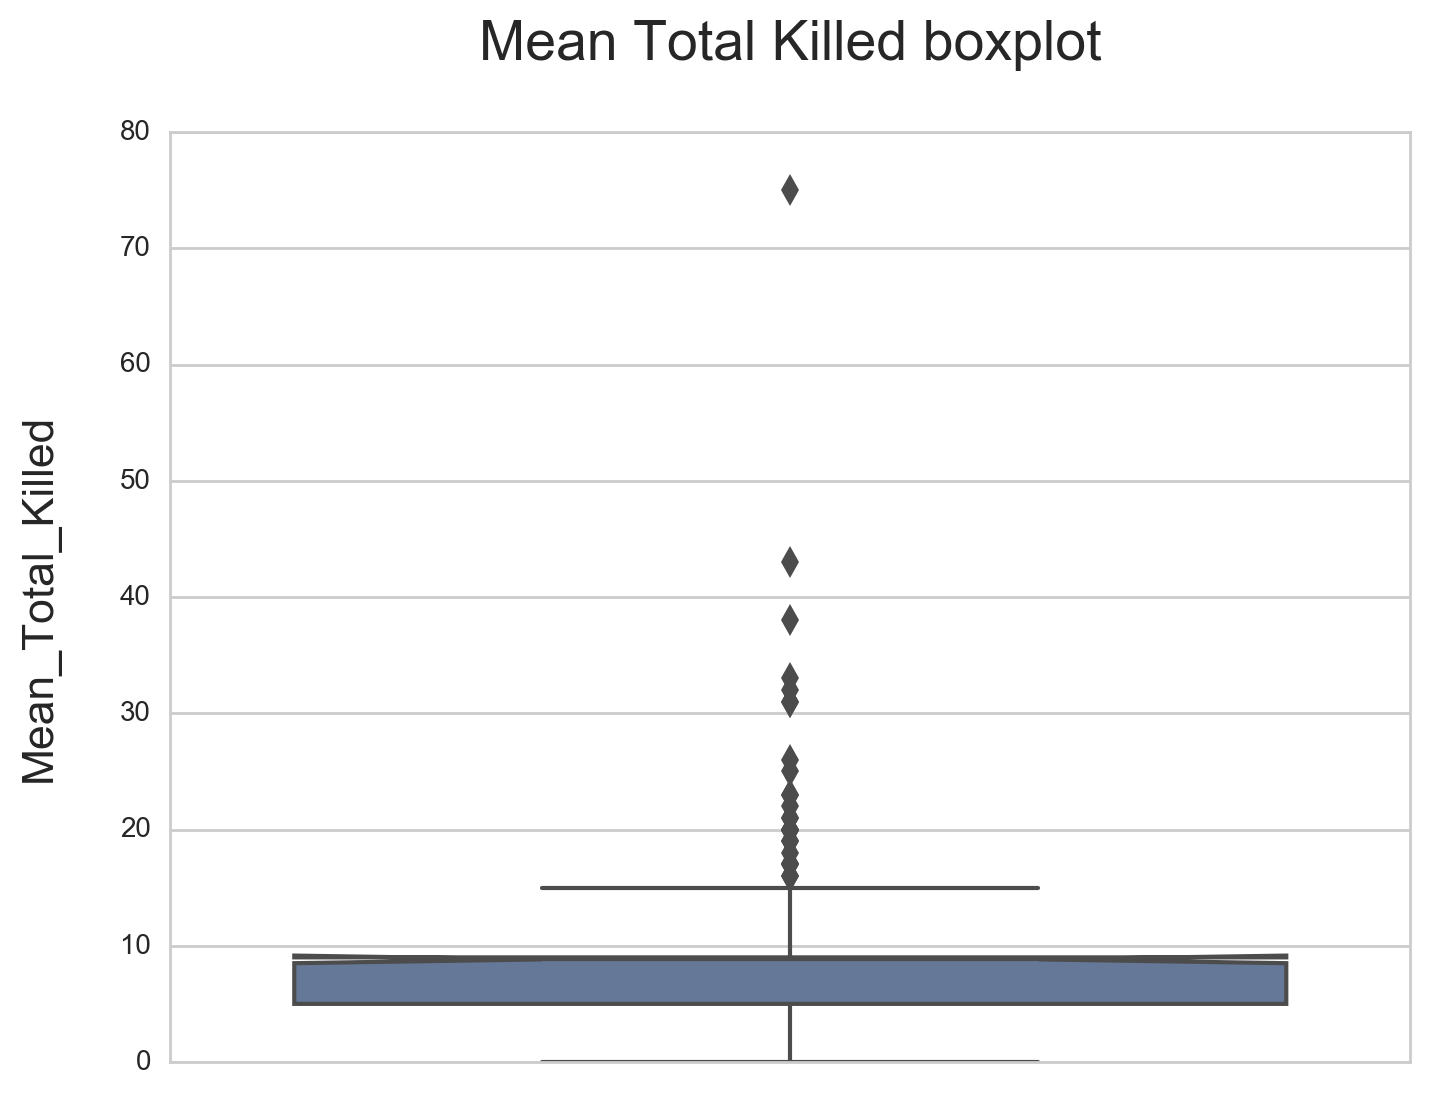

In [22]:
#Since there are outliers at the max end, we will be using boxplot
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.Mean_Total_Killed, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Mean_Total_Killed\n', fontsize=16)
ax.set_title('Mean Total Killed boxplot\n', fontsize=20)

plt.show()

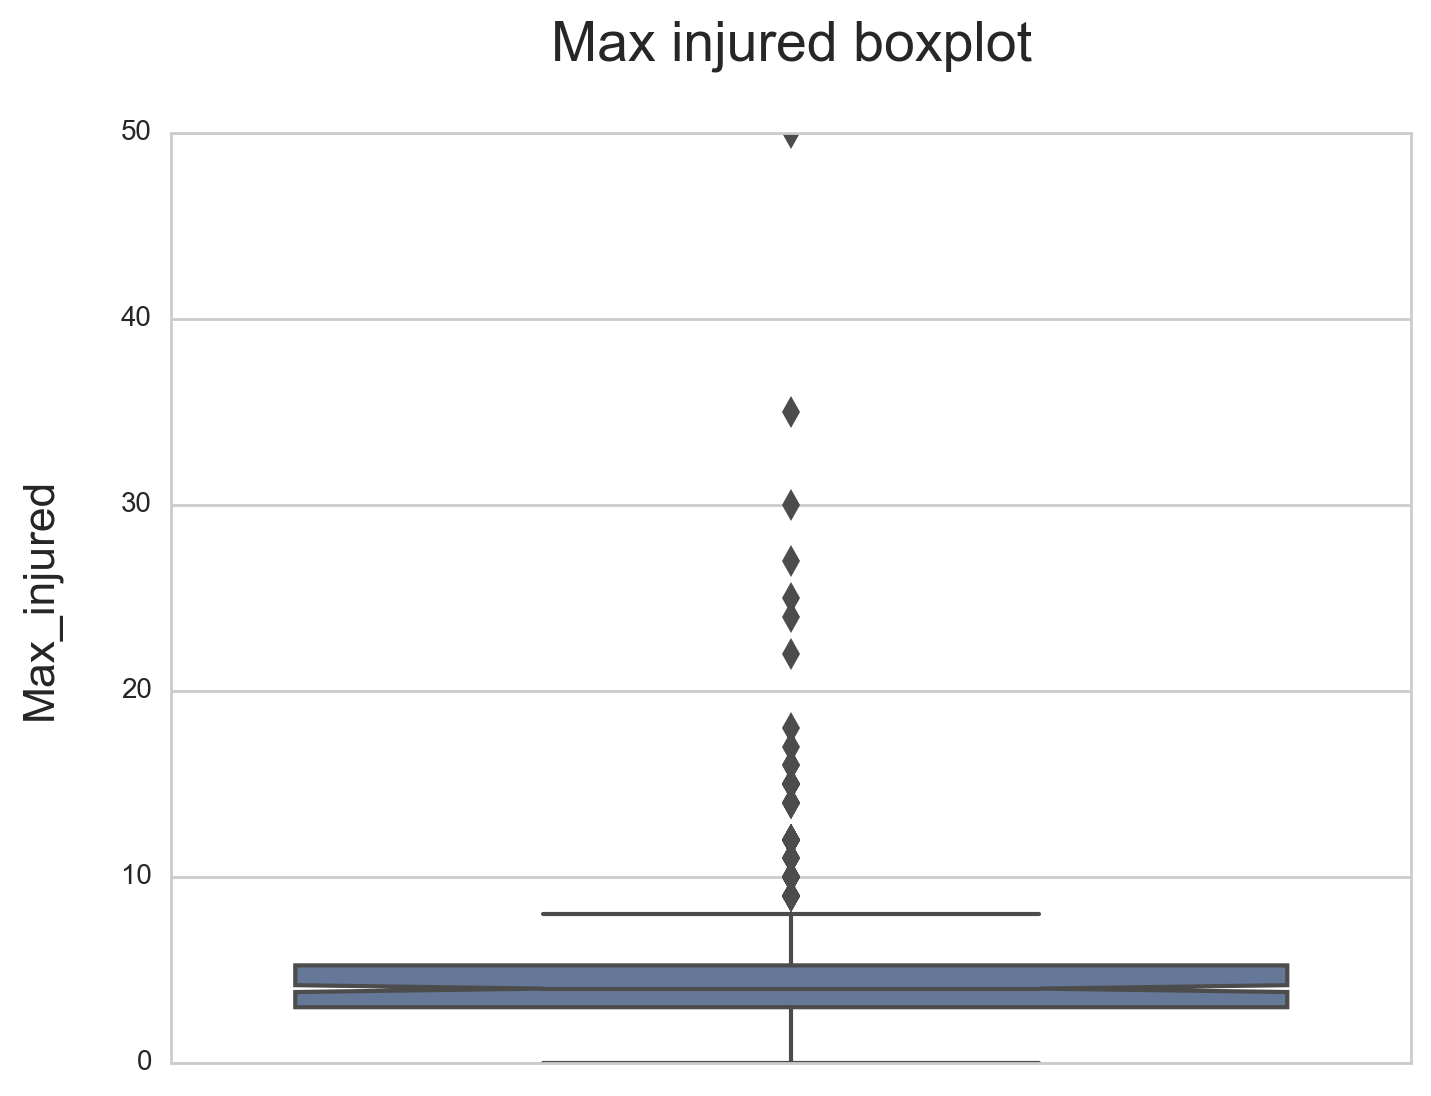

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.Max_injured, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Max_injured\n', fontsize=16)
ax.set_title('Max injured boxplot\n', fontsize=20)

plt.show()

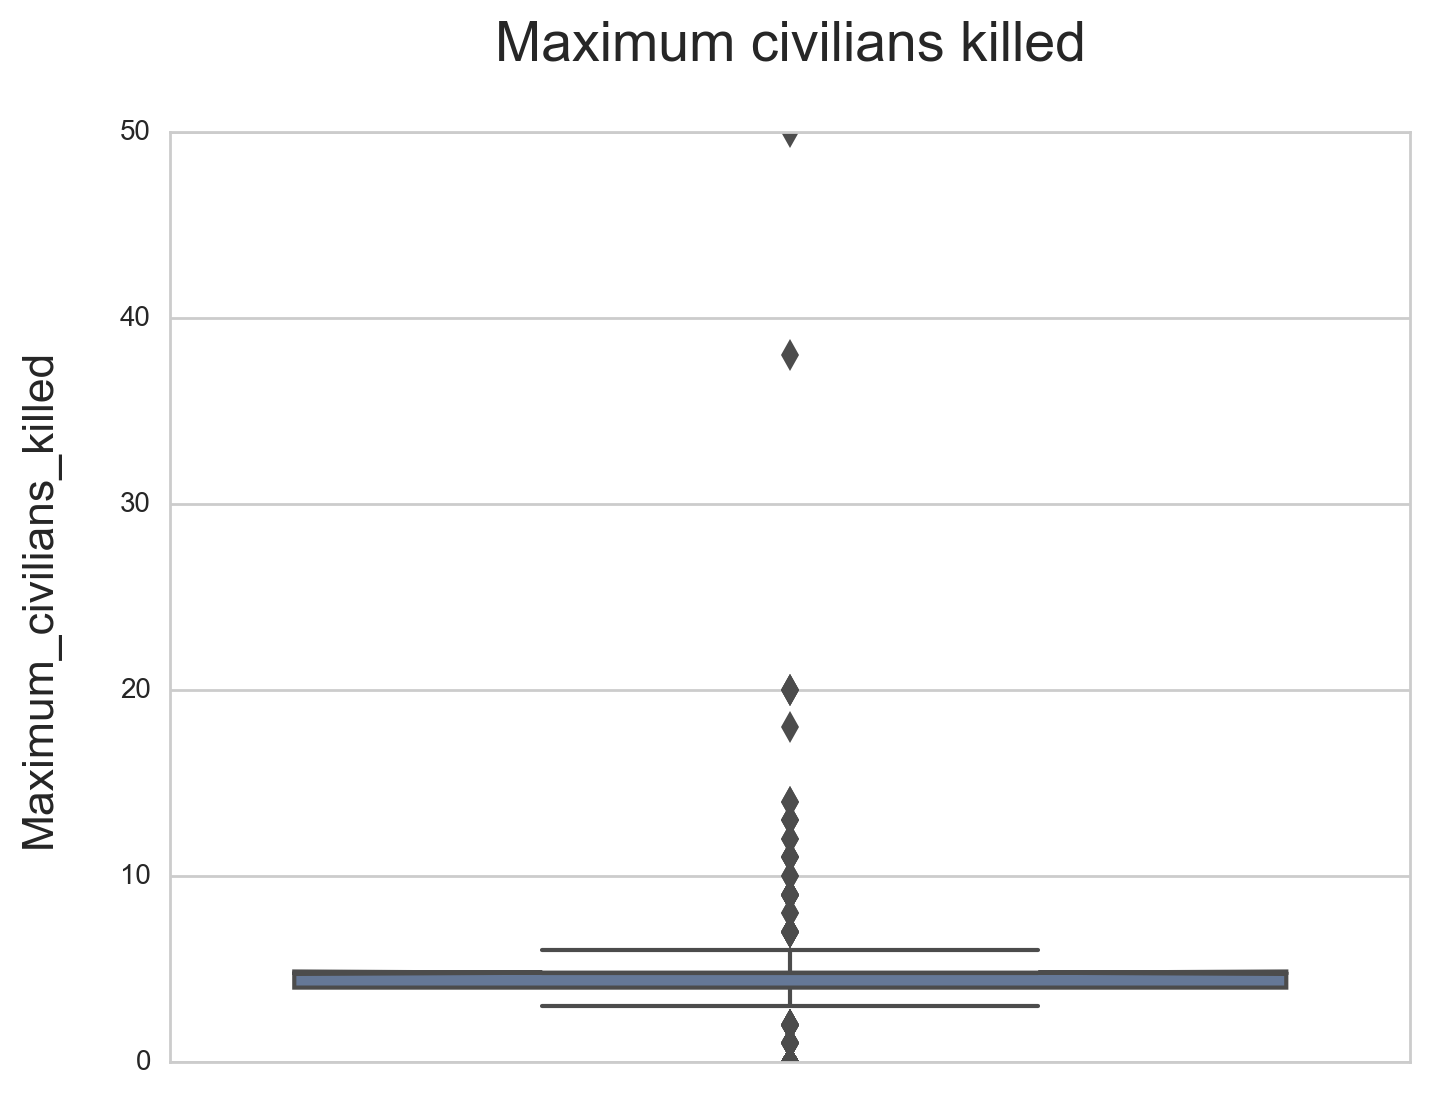

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.Maximum_civilians_killed, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Maximum_civilians_killed\n', fontsize=16)
ax.set_title('Maximum civilians killed\n', fontsize=20)

plt.show()

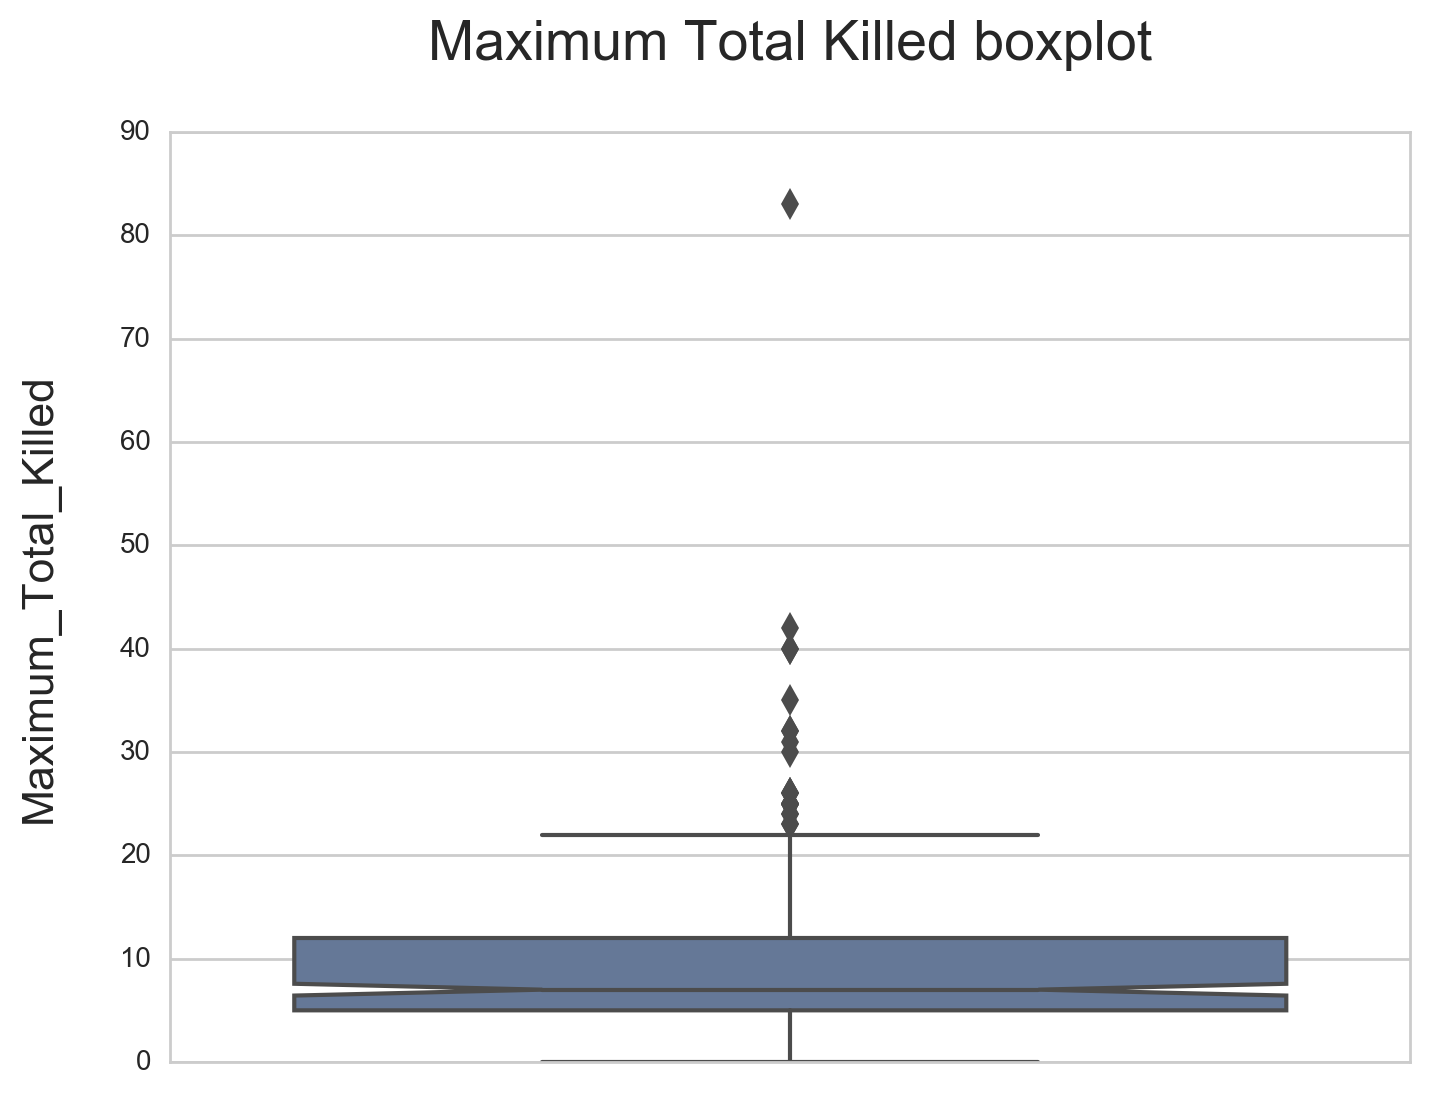

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.Maximum_Total_Killed, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Maximum_Total_Killed\n', fontsize=16)
ax.set_title('Maximum Total Killed boxplot\n', fontsize=20)

plt.show()

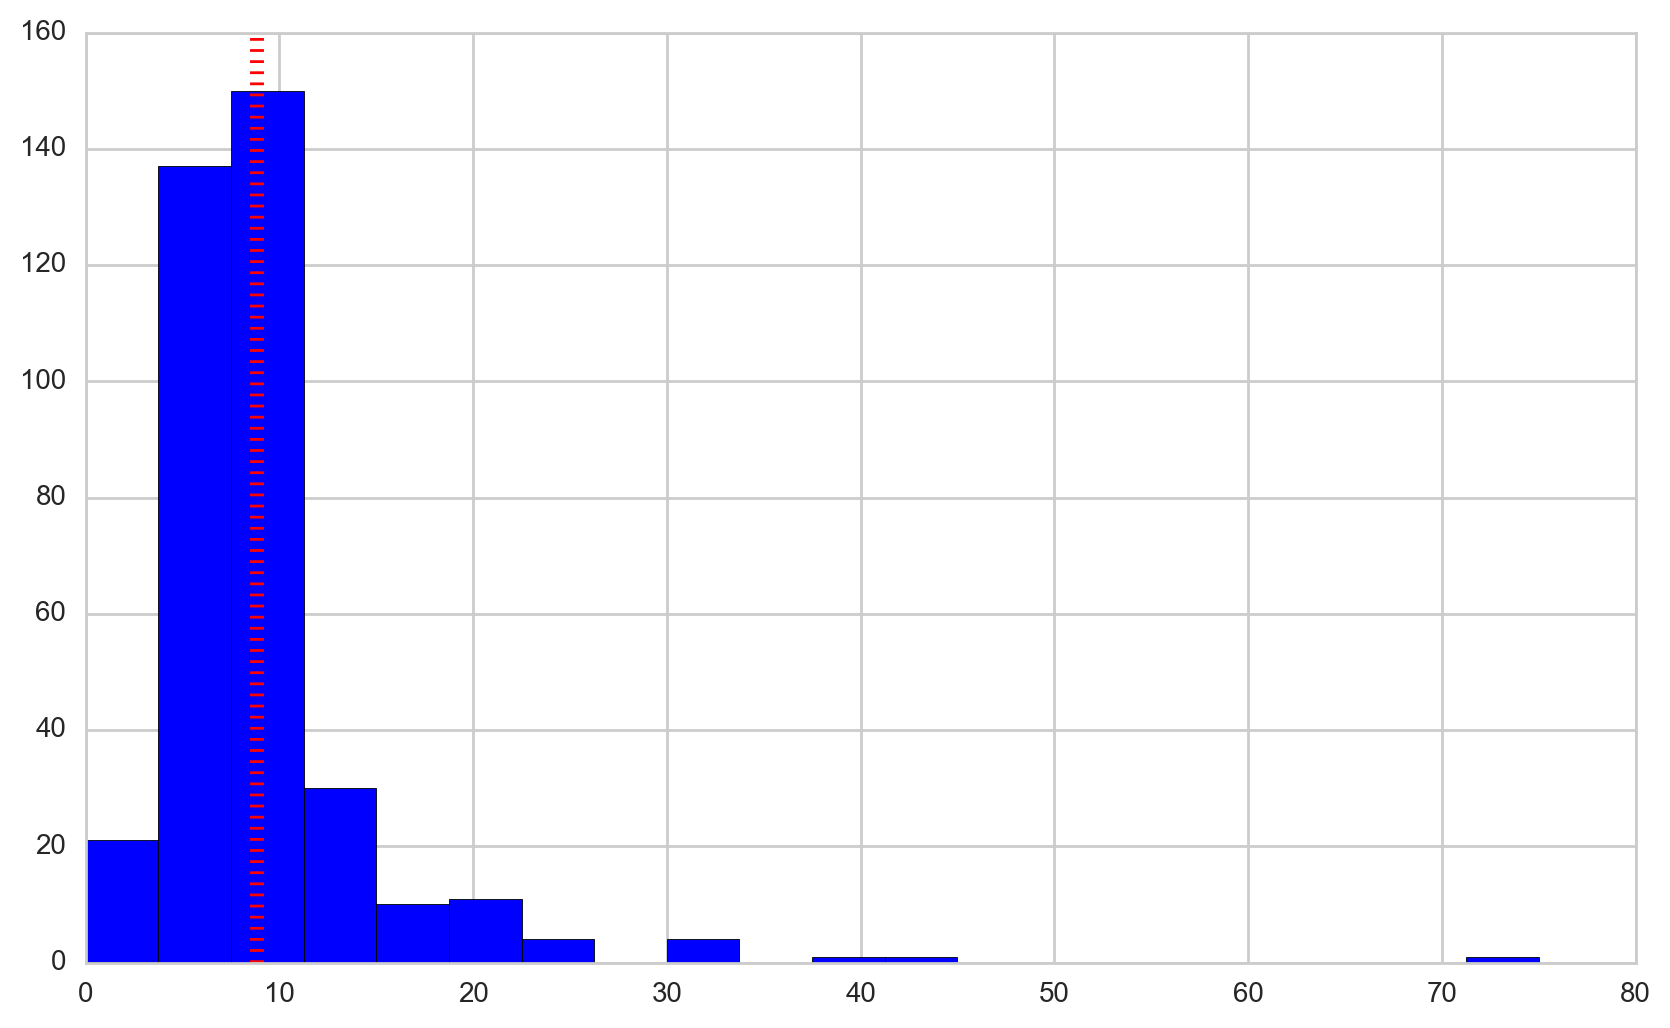

In [26]:
#Mean total death distribution and its mean
fig = plt.figure(figsize=(10,6))
result = plt.hist(df['Mean_Total_Killed'], bins=20, color='b')
plt.axvline(df['Mean_Total_Killed'].mean(), color='r', linestyle='dotted', linewidth=5)

In [66]:
print df['Mean_Total_Killed'].mean()
print df['Mean_Total_Killed'].std()

8.82720588235
6.36787301313


In [27]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

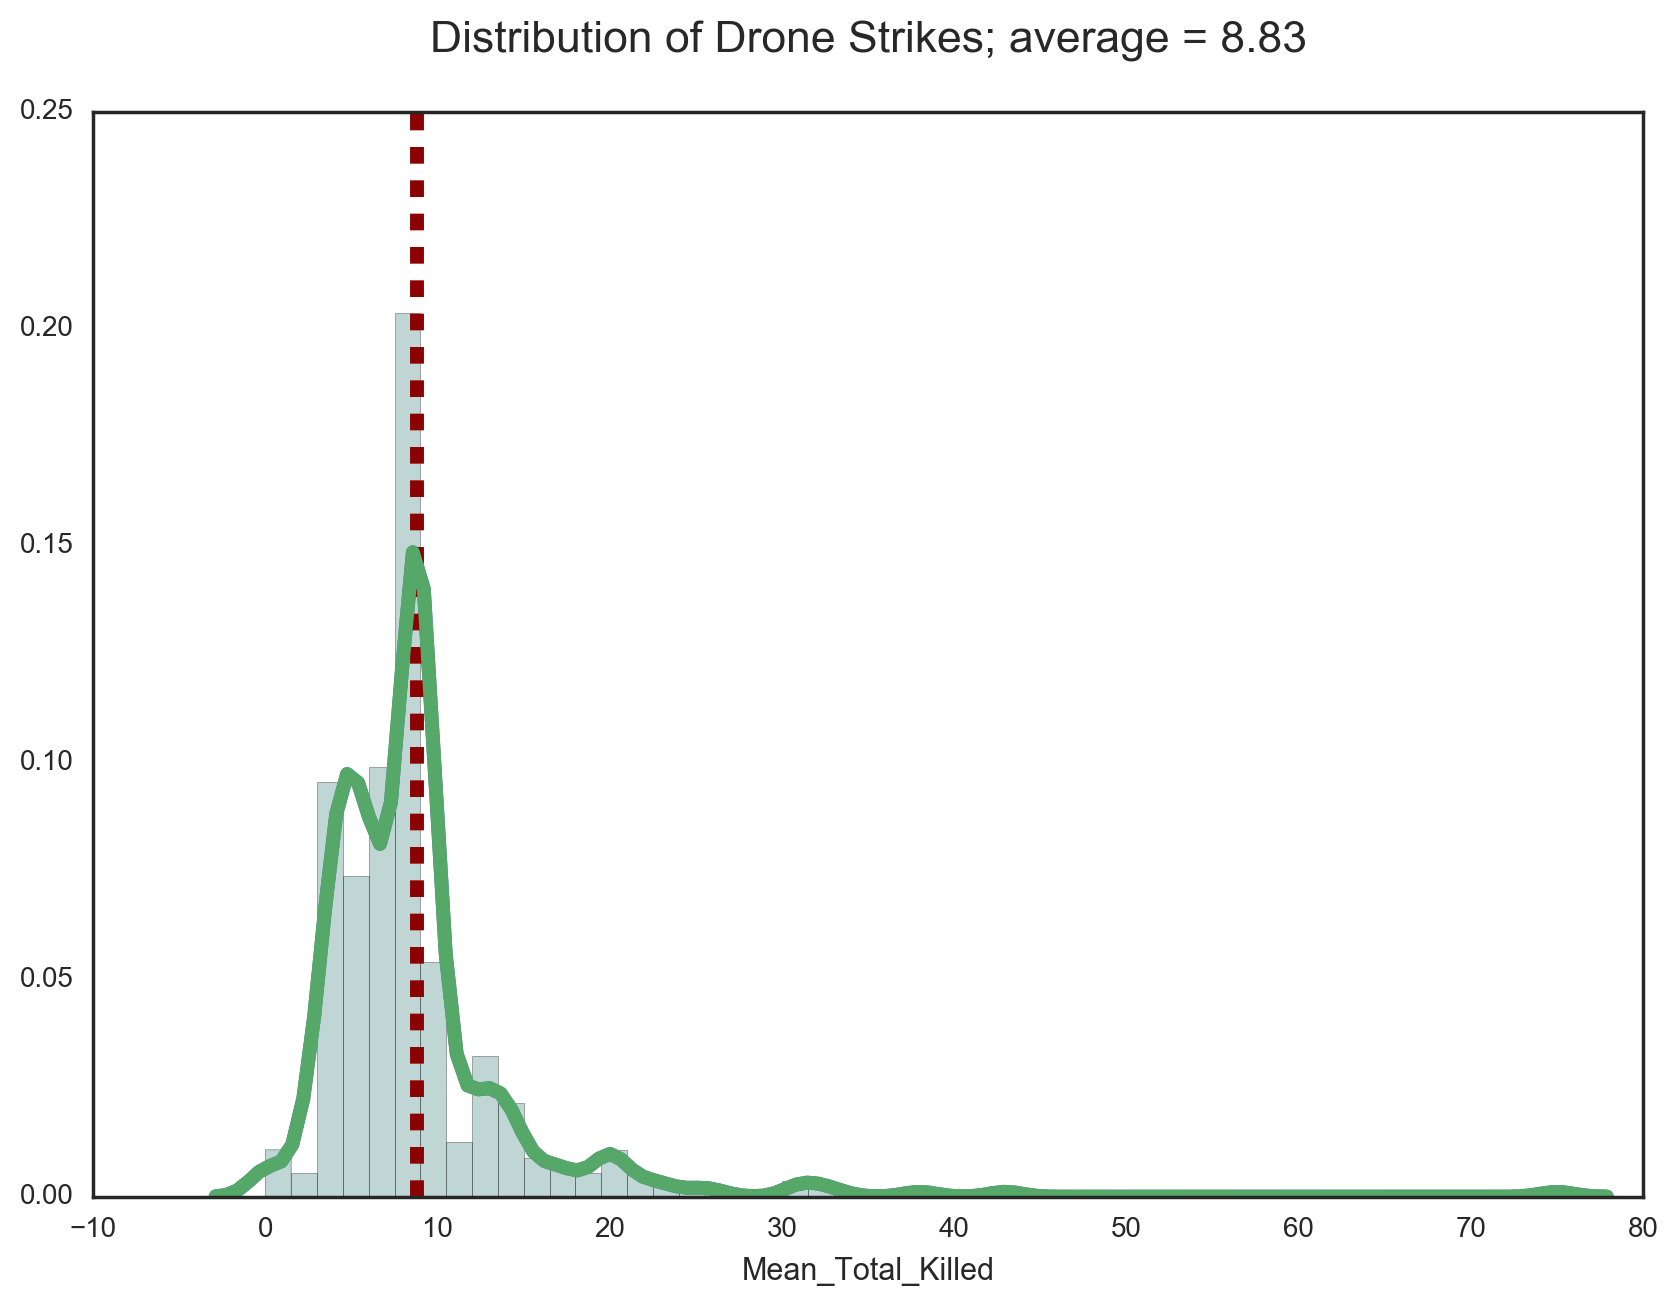

In [28]:
histogram_plotter("Drone Strikes", df.Mean_Total_Killed)

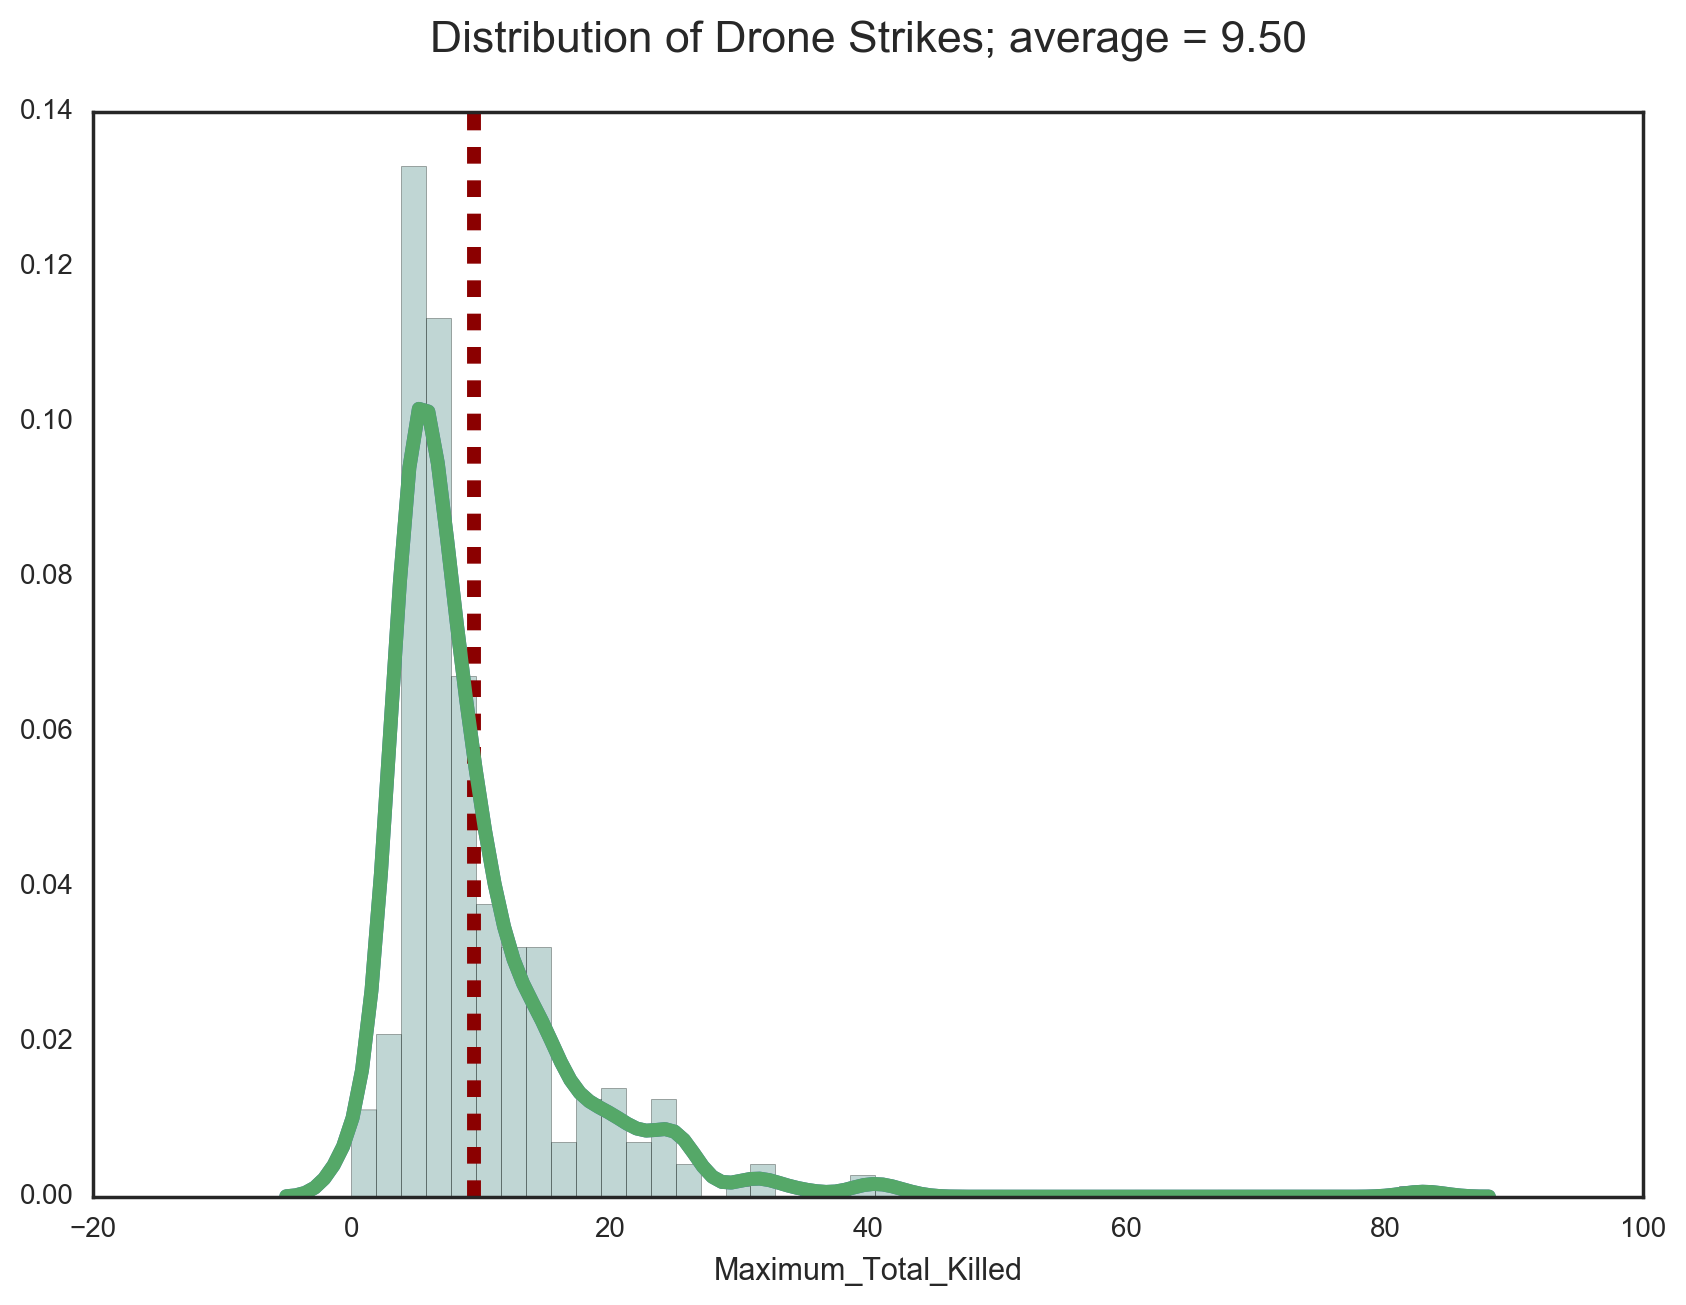

In [63]:
histogram_plotter("Drone Strikes", df.Maximum_Total_Killed)

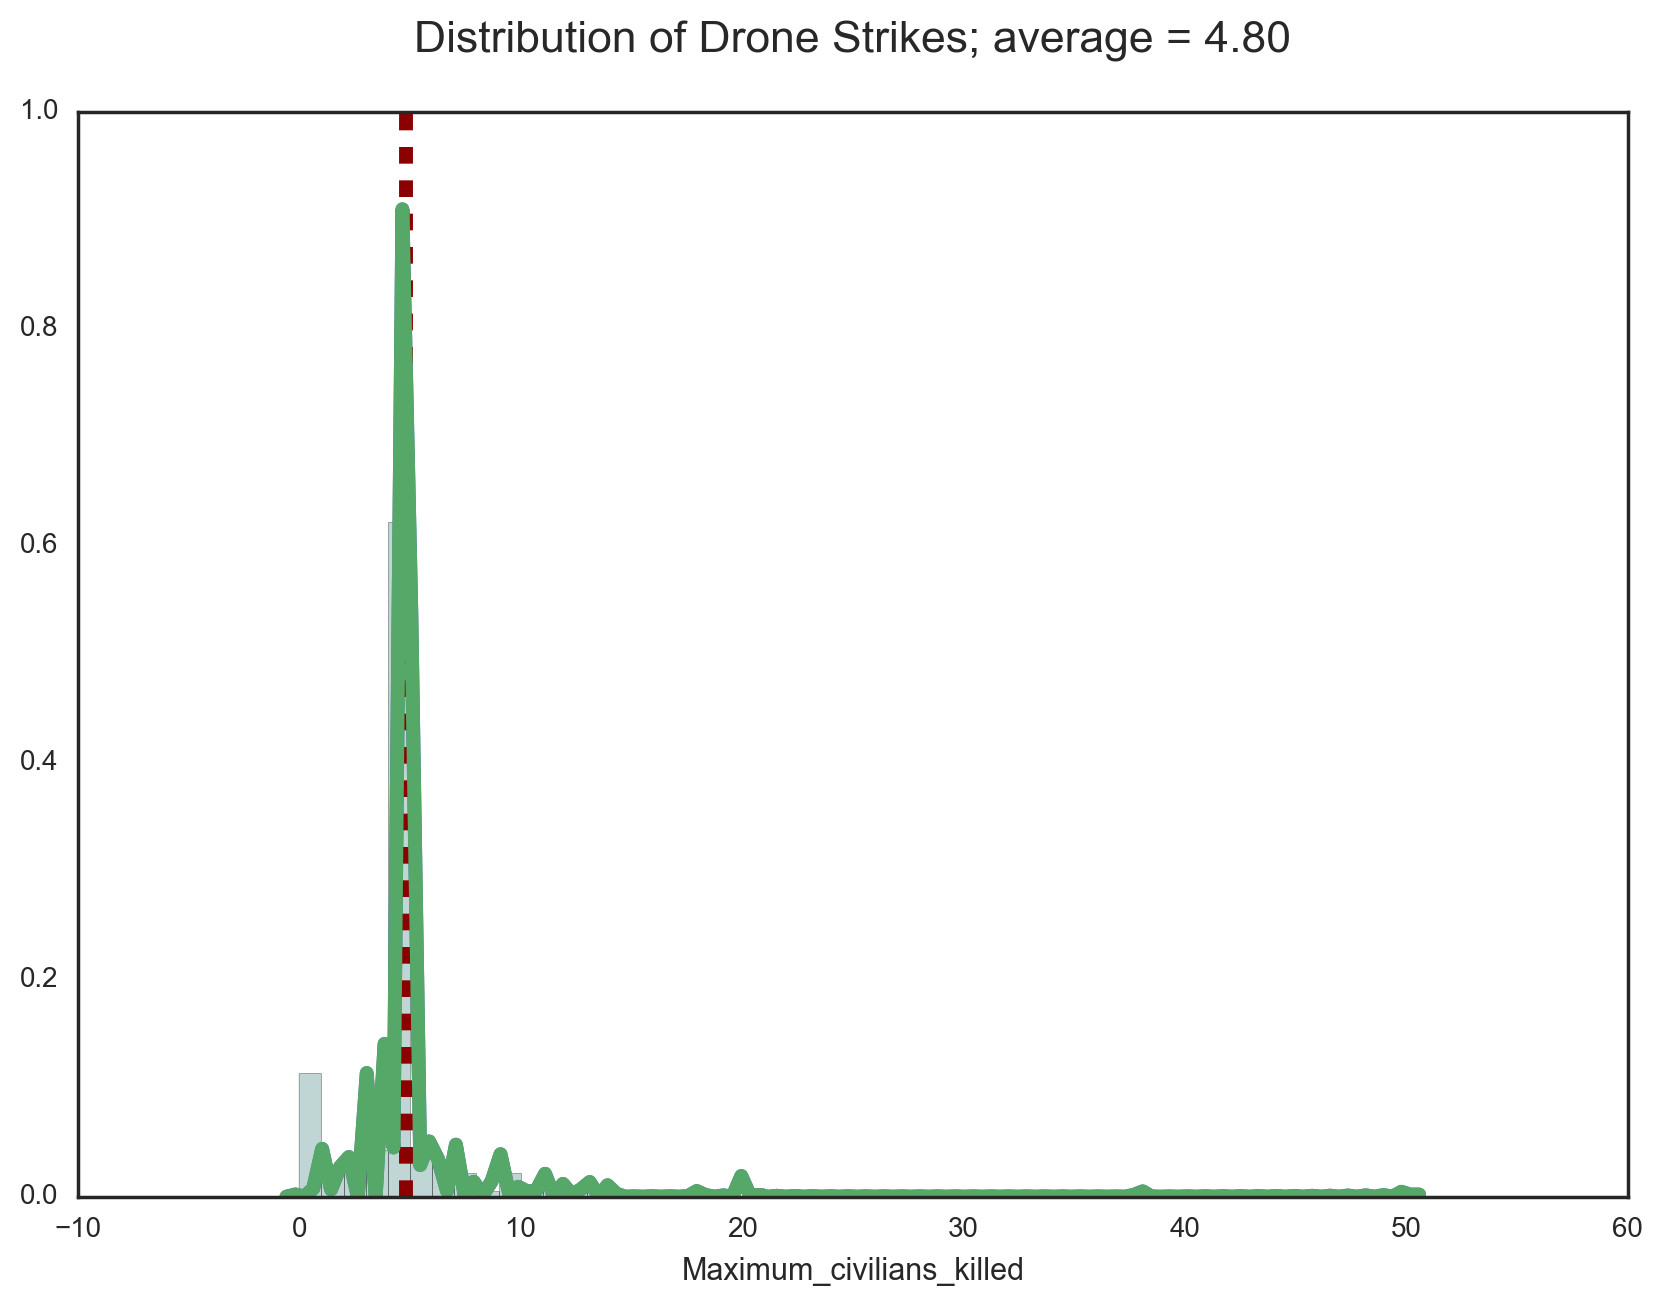

In [64]:
histogram_plotter("Drone Strikes", df.Maximum_civilians_killed)

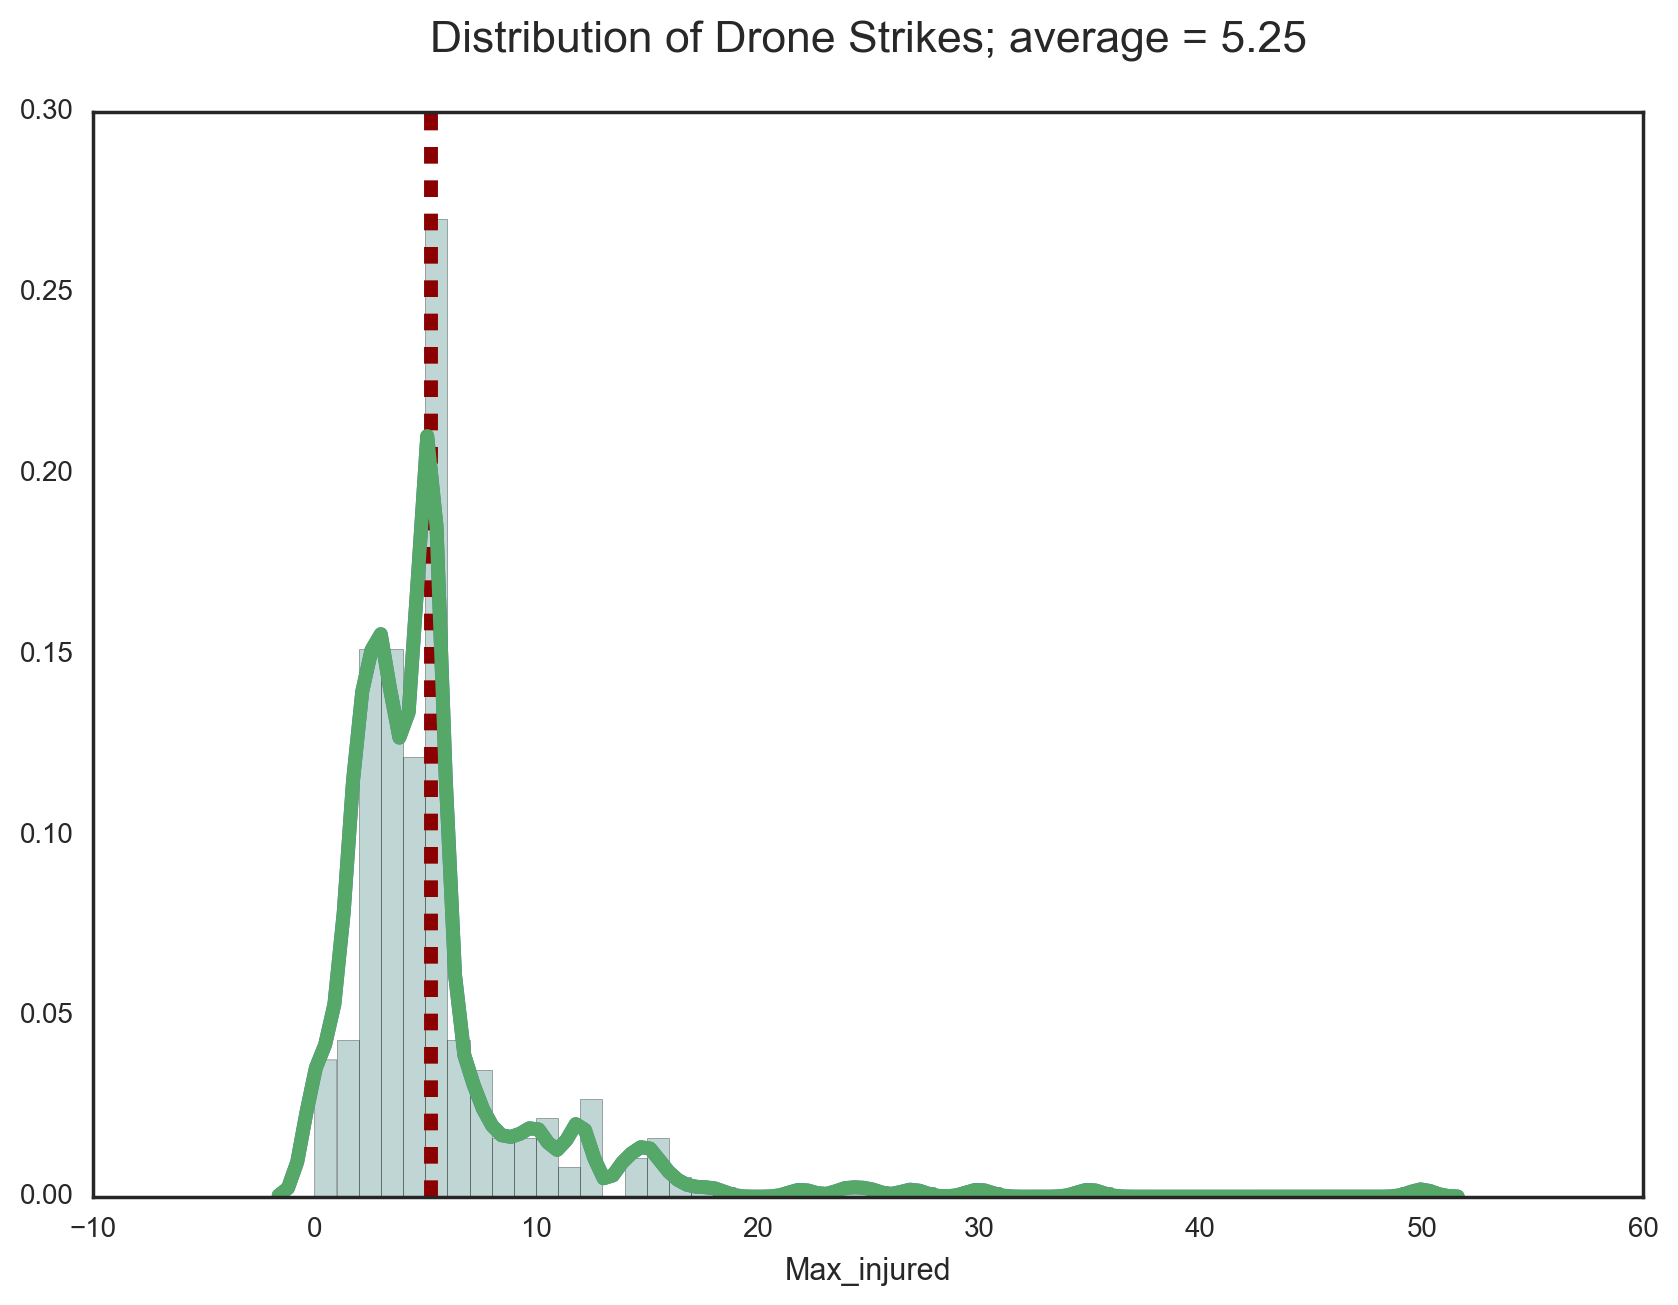

In [65]:
histogram_plotter("Drone Strikes", df.Max_injured)

In [77]:
def seriess(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

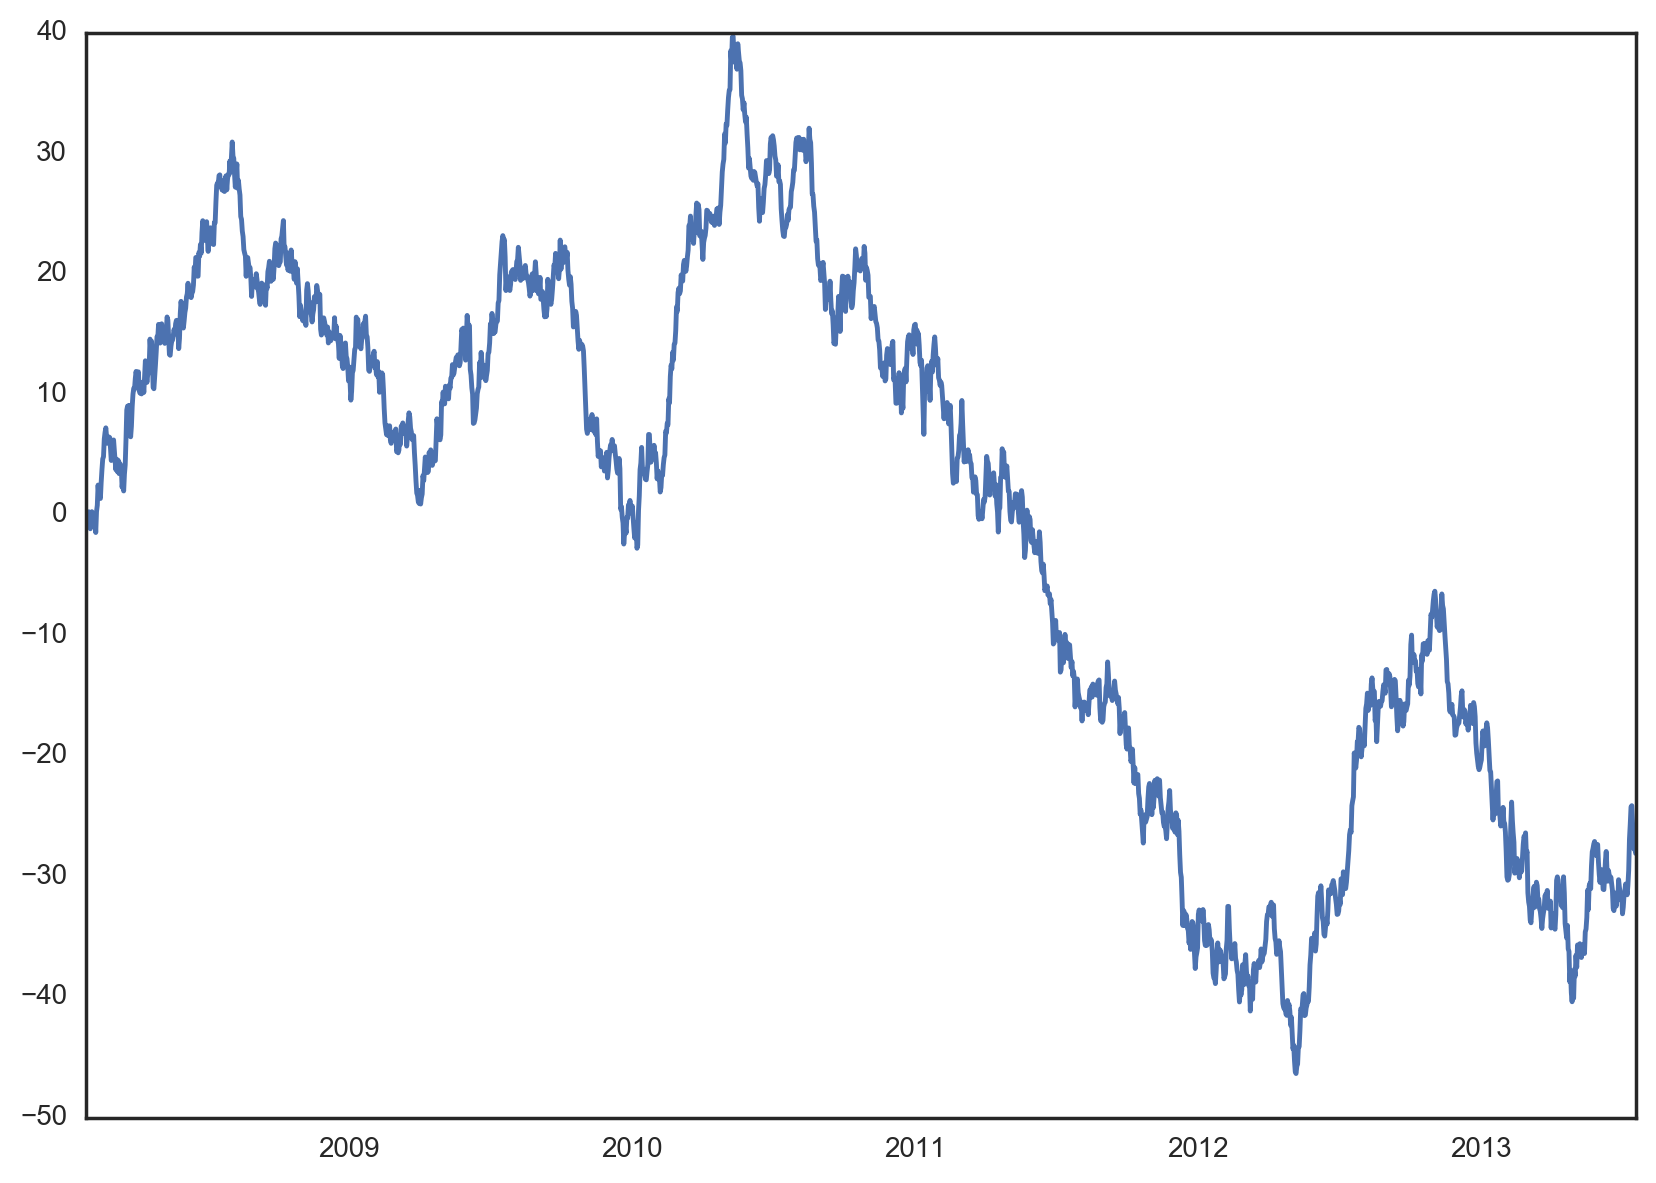

In [79]:
a=seriess('1/29/2008',2000)
#This time series is not showing an actual trend. There were more deaths in 2009 than in 2011 (see chart above sorted by year and mean deaths).
#Looking at the dataset; there is no data from 2011-2013 and missing values were replaced by all means. 
#Thus trend after 2011 will not explain anything. 

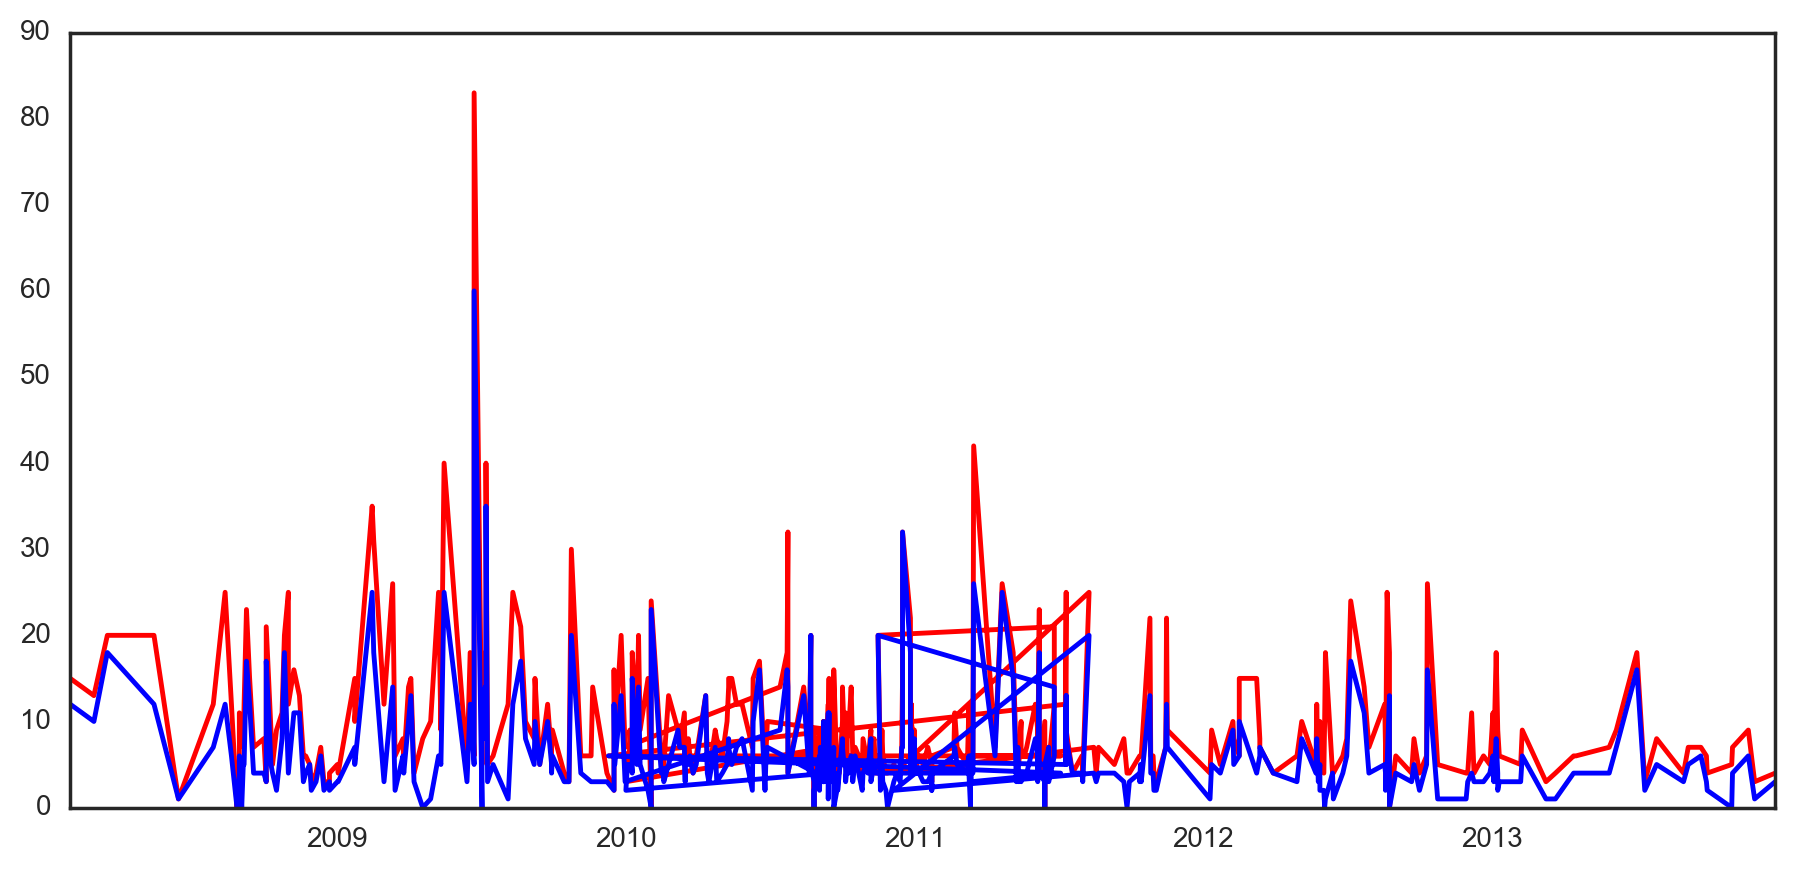

In [95]:
fig = plt.figure(figsize=(11,5))
plt.plot(df.Date, df.Maximum_Total_Killed, c='red')
plt.plot(df.Date, df.Minimum_total_Killed, c='blue')
#This time series is consistent with the table I have. More death in 2009 than any other years. 

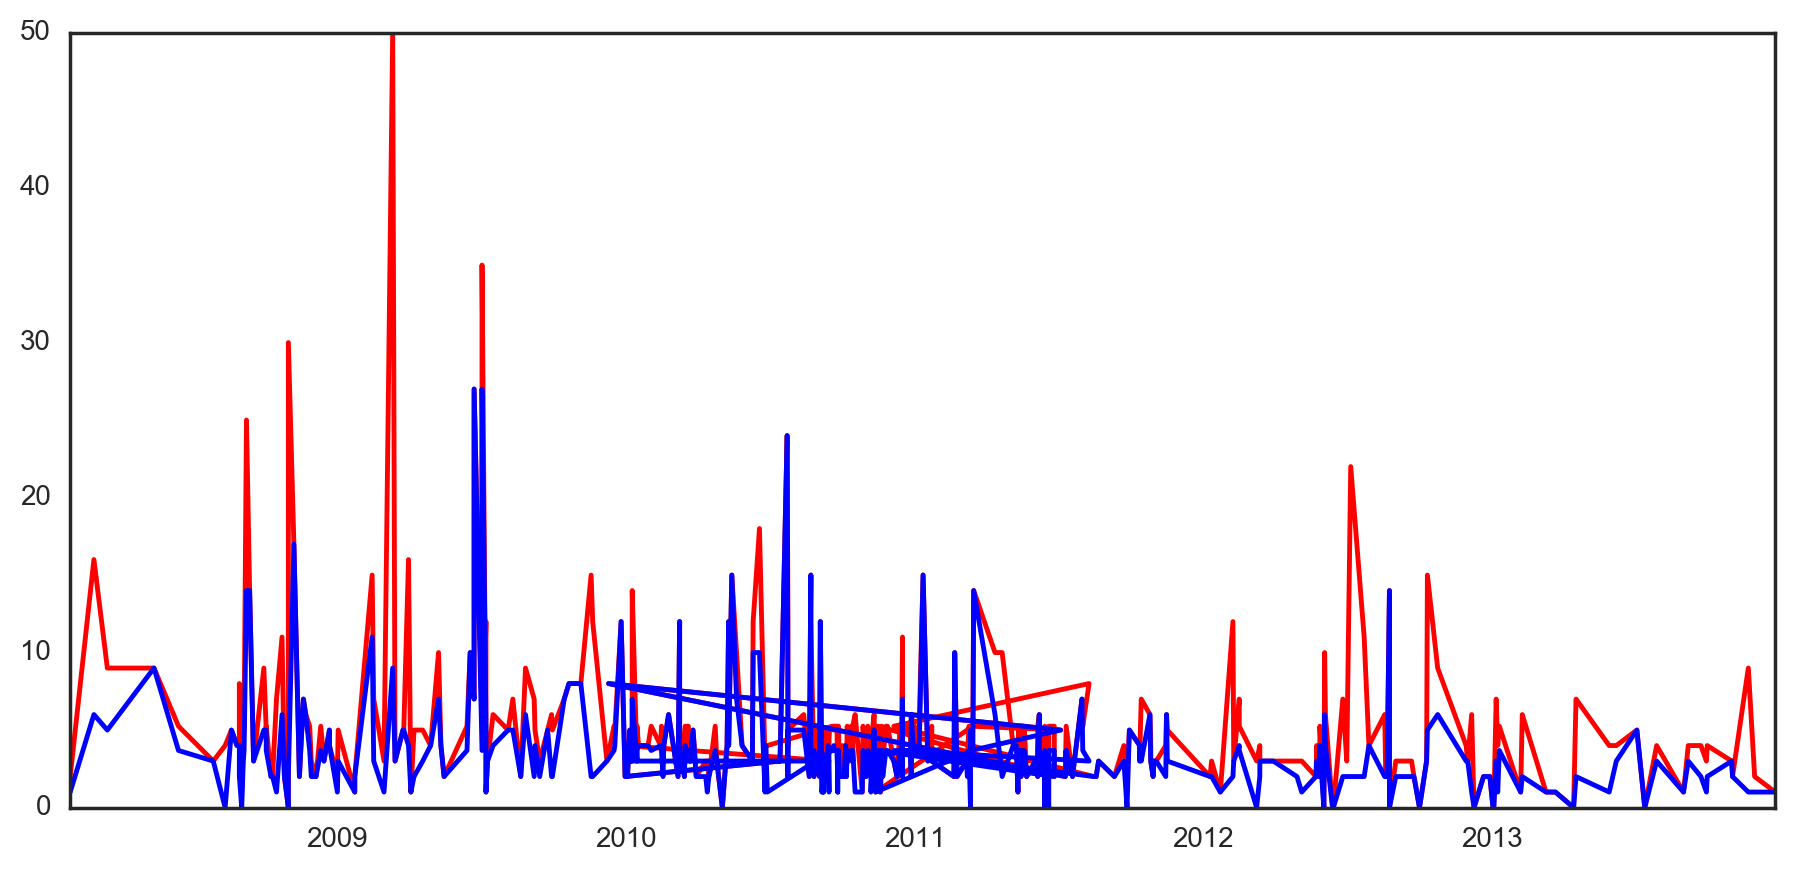

In [96]:
fig = plt.figure(figsize=(11,5))
plt.plot(df.Date, df.Max_injured, c='red')
plt.plot(df.Date, df.Min_injured, c='blue')
#Comparing the time series with the table shows consistent result. 

In [97]:
df.groupby(['Year'], sort=True)[['Max_injured']].mean().sort_values(by=['Max_injured'], ascending=False).reset_index()

,Year,Max_injured
0,2009,7.870246
1,2008,6.690569
2,2010,4.860843
3,2011,4.569485
4,2012,4.406180
5,2013,3.194382


In [98]:
df.groupby(['Year'], sort=True)[['Min_injured']].mean().sort_values(by=['Min_injured'], ascending=False).reset_index()

,Year,Min_injured
0,2009,5.198608
1,2008,4.326475
2,2010,3.806287
3,2011,3.555570
4,2012,2.465884
5,2013,1.654860


MTK mean: 8.82720588235
MTK std: 6.35926195711


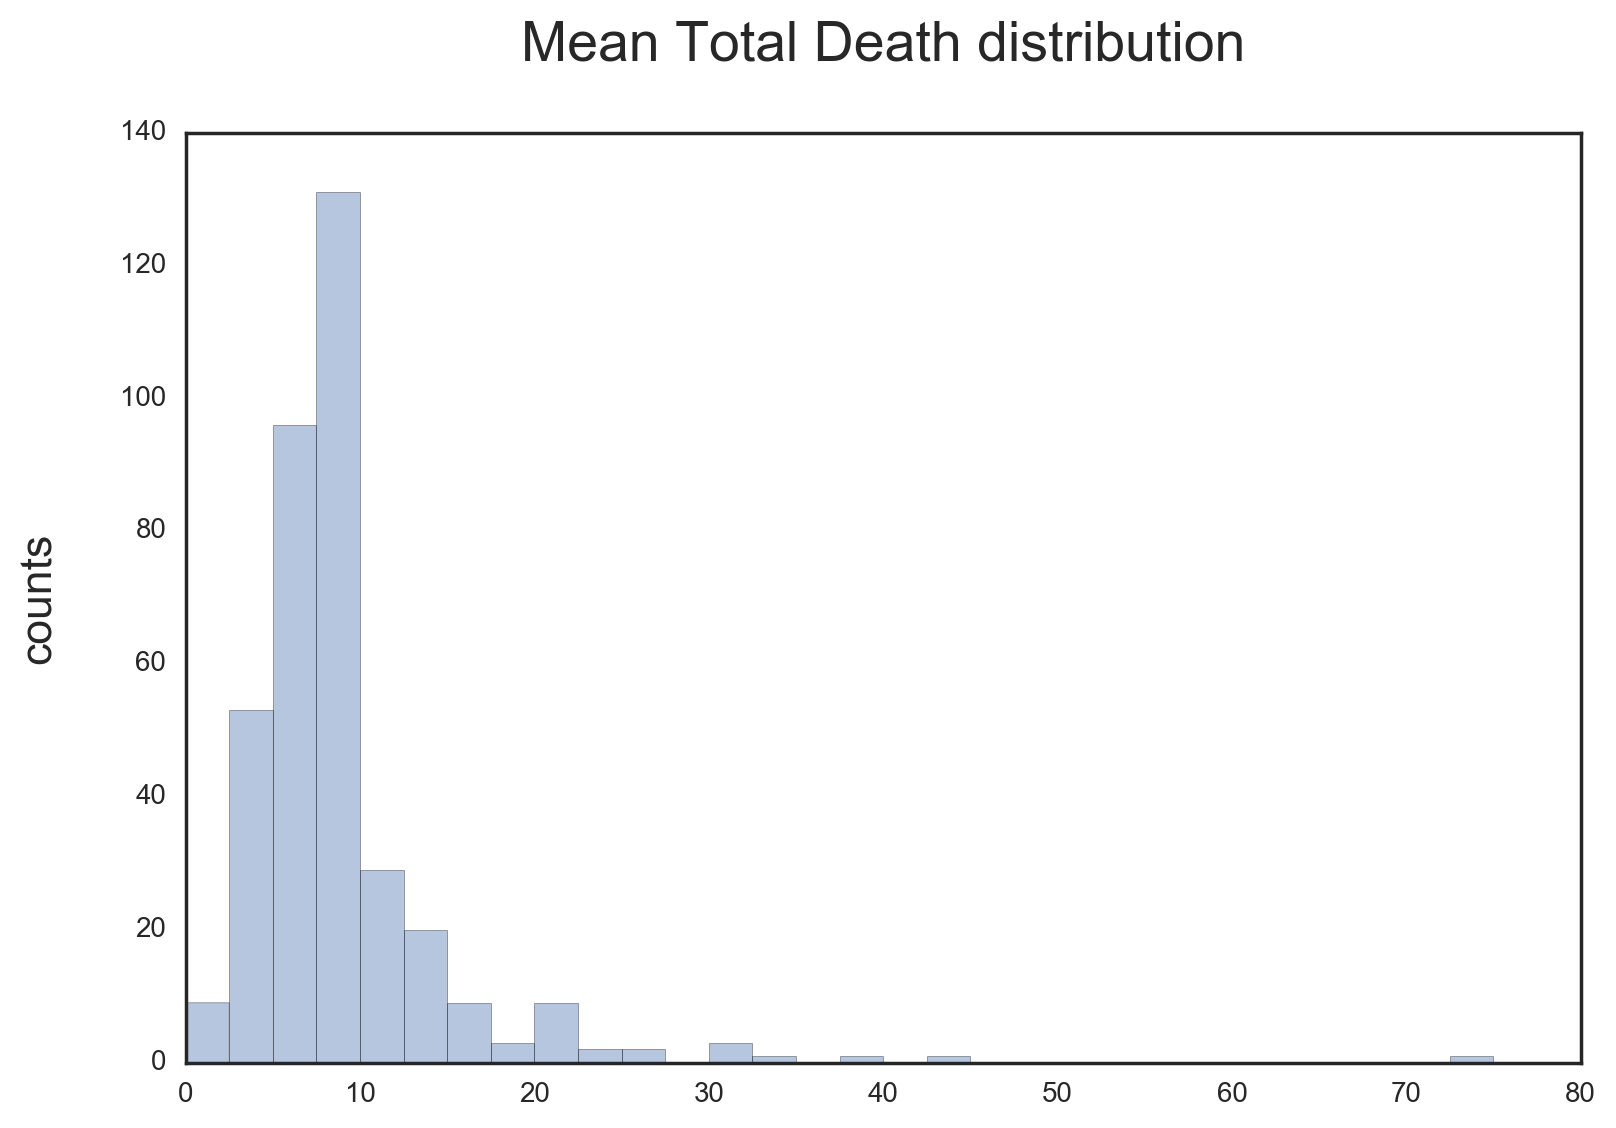

In [31]:
Mean_Total_Killed = df.Mean_Total_Killed.values

mtk_mean = np.mean(Mean_Total_Killed)
mtk_std = np.std(Mean_Total_Killed)
print 'MTK mean:', mtk_mean
print 'MTK std:', mtk_std

mtk_norm = (Mean_Total_Killed - mtk_mean) / mtk_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(Mean_Total_Killed, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Mean Total Death distribution\n', fontsize=20)

plt.show()

In [48]:
import plotly.plotly as py
import plotly.graph_objs as go

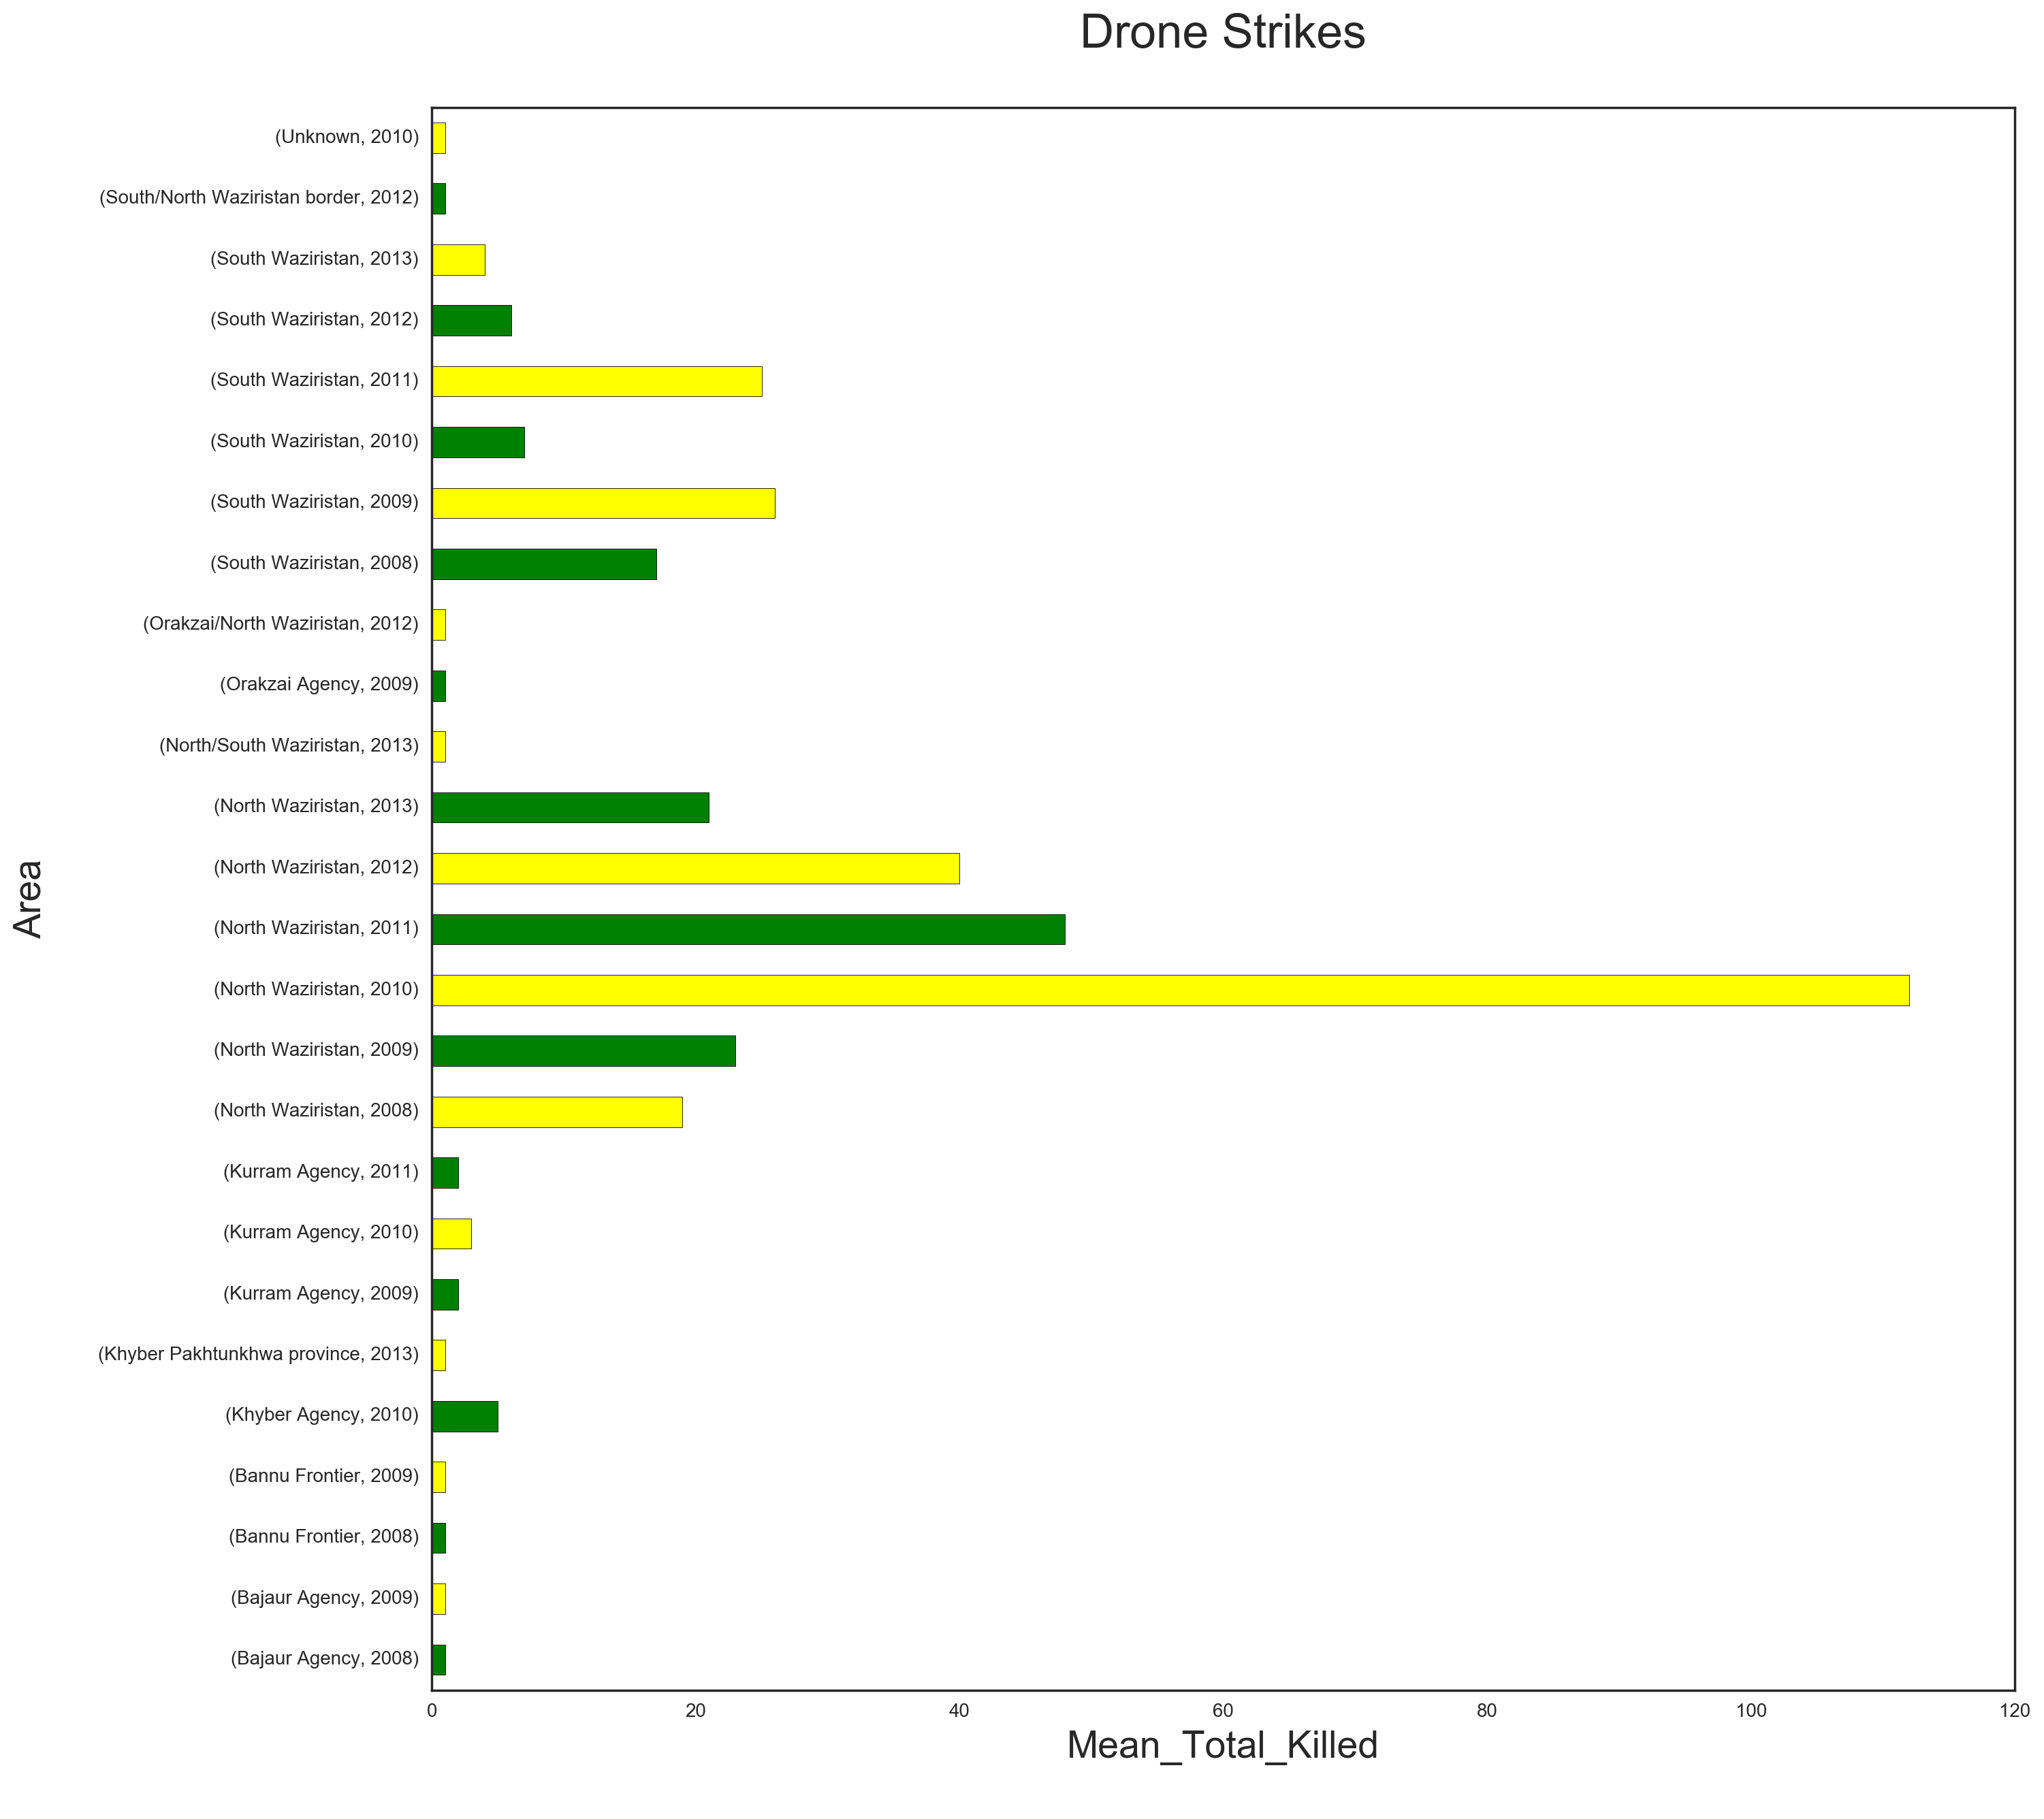

In [100]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.groupby(['Area', 'Year']).size().plot(kind="barh", colors=['green', 'yellow'], ax=ax)
plt.title('Drone Strikes\n', fontsize = 25)
plt.ylabel('Area\n', fontsize=20)
plt.xlabel('Mean_Total_Killed\n', fontsize=20)
plt.show()
#Overall North Waziristan have higher mean deaths. 

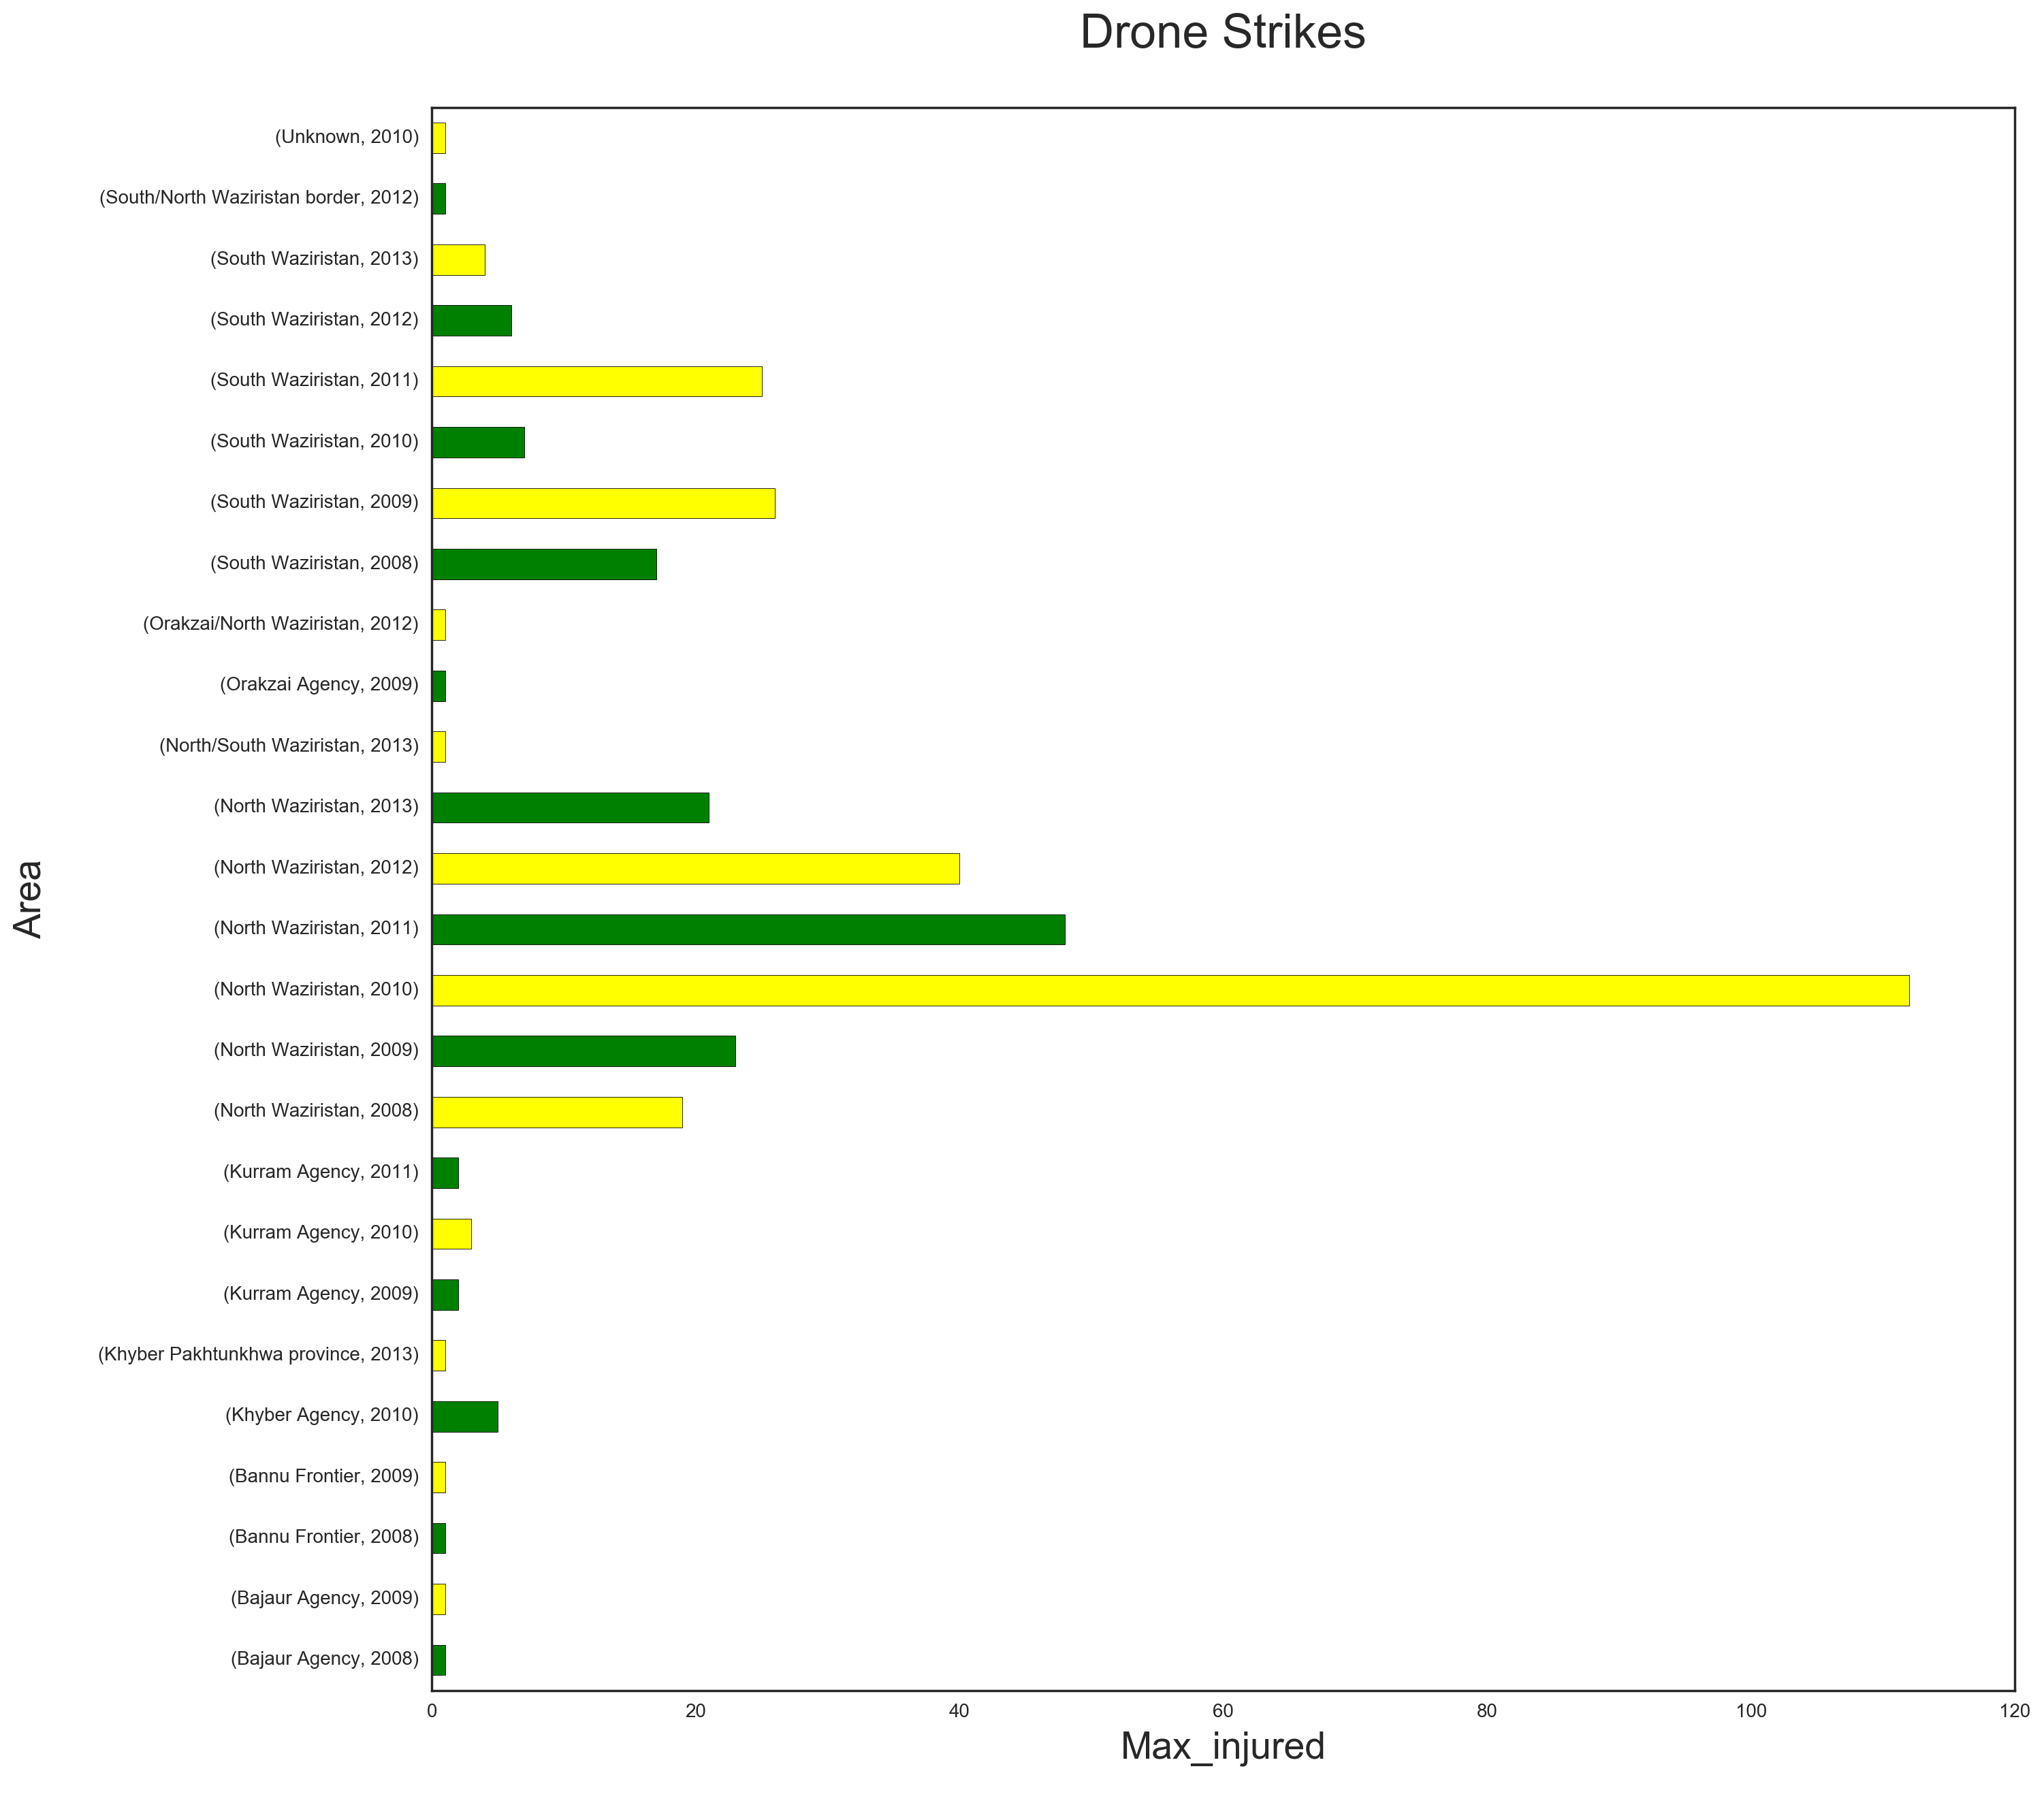

In [103]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.groupby(['Area', 'Year']).size().plot(kind="barh", colors=['green', 'yellow'], ax=ax)
plt.title('Drone Strikes\n', fontsize = 25)
plt.ylabel('Area\n', fontsize=20)
plt.xlabel('Max_injured\n', fontsize=20)
plt.show()
#Number of injury is higher in North Waziristan area

In [68]:
#Because mean value has been used; this normalized the distribution of the data. When you look at the chart
#North Waziristan area shows more mean total killed compared & injured compared to Bajaur Agency.
df.groupby(['Year', 'Area'], sort=True)[['Mean_Total_Killed']].mean().sort_values(by=['Mean_Total_Killed'], ascending=False).reset_index()

,Year,Area,Mean_Total_Killed
0,2009,Kurram Agency,25.500000
1,2009,Bajaur Agency,25.000000
2,2010,Khyber Agency,14.800000
3,2008,Bajaur Agency,14.000000
4,2009,Orakzai Agency,14.000000
5,2009,South Waziristan,13.346154
6,2010,South Waziristan,10.000000
7,2009,North Waziristan,9.478261
8,2008,North Waziristan,9.421053
9,2012,Orakzai/North Waziristan,8.827206


In [69]:
df.groupby(['Year', 'Area'], sort=True)[['Max_injured']].mean().sort_values(by=['Max_injured'], ascending=False).reset_index()

,Year,Area,Max_injured
0,2009,Kurram Agency,28.500000
1,2009,Orakzai Agency,16.000000
2,2012,Orakzai/North Waziristan,15.000000
3,2008,Bajaur Agency,9.000000
4,2013,Khyber Pakhtunkhwa province,9.000000
5,2009,South Waziristan,8.096025
6,2009,Bajaur Agency,8.000000
7,2010,Khyber Agency,7.699329
8,2008,South Waziristan,7.102645
9,2010,South Waziristan,7.035475


In [70]:
#Adding month variable to obtain distribution
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df

,Strike ID,Bureau ID,Year,Date,Location,Area,Target,Minimum_total_Killed,Mean_Total_Killed,Maximum_Total_Killed,Number of deaths,Minimum_civilians_killed,Maximum_civilians_killed,Civilians Killed,Min_injured,Max_injured,Injured,Month
0,15,B12,2008,2008-01-29,Mir Ali,North Waziristan,Abu Laith al-Libi,12,14.000000,15,15-Dec,4.000000,6.0,6-Apr,1.000000,2.000000,2-Jan,1
1,16,B13,2008,2008-02-28,Azam Warsak,South Waziristan,NaN,10,11.000000,13,13-Oct,0.000000,0.0,0-5,6.000000,16.000000,16-Jun,2
2,17,B14,2008,2008-03-16,Dhook Pir Bagh,South Waziristan,NaN,18,12.000000,20,18-20,0.000000,4.0,0-4,5.000000,9.000000,9,3
3,18,B15,2008,2008-05-14,Damadola,Bajaur Agency,Abu Sulayman al-Jazairi,12,14.000000,20,20-Dec,4.000000,6.0,6-Apr,9.000000,9.000000,9,5
4,19,B16,2008,2008-06-14,Makeen,South Waziristan,Baitullah Mehsud,1,1.000000,1,1,0.000000,1.0,0-1,3.681208,5.248322,NaN,6
5,20,B17,2008,2008-07-28,Zeralita,South Waziristan,Abu Khabab al-Masri,7,10.000000,12,12-Jul,1.000000,5.0,5-Jan,3.000000,3.000000,3,7
6,21,B18,2008,2008-08-12,Bhaggar,South Waziristan,Abdul Rehman,12,19.000000,25,25-Dec,0.000000,5.0,0-5,0.000000,4.000000,4,8
7,22,B19,2008,2008-08-20,Zari Noor,South Waziristan,NaN,6,10.000000,12,12-Jun,1.866667,4.8,Unknown,5.000000,5.000000,5,8
8,23,B20,2008,2008-08-27,Ganki Khel,South Waziristan,NaN,0,0.000000,0,0,1.866667,4.8,0,4.000000,4.000000,4,8
9,24,B21,2008,2008-08-30,Korzai,South Waziristan,NaN,4,5.000000,5,5-Apr,1.866667,4.8,NaN,4.000000,4.000000,4,8


In [73]:
df.corr()

,Strike ID,Year,Minimum_total_Killed,Mean_Total_Killed,Maximum_Total_Killed,Minimum_civilians_killed,Maximum_civilians_killed,Min_injured,Max_injured,Month
Strike ID,1.000000,0.949950,-0.187884,-0.103780,-0.203748,-0.237455,-0.245919,-0.260641,-0.240364,-0.024148
Year,0.949950,1.000000,-0.167151,-0.073999,-0.174591,-0.215081,-0.239642,-0.251498,-0.223495,-0.212550
Minimum_total_Killed,-0.187884,-0.167151,1.000000,0.828300,0.895296,0.483179,0.540400,0.445108,0.407136,-0.047834
Mean_Total_Killed,-0.103780,-0.073999,0.828300,1.000000,0.860479,0.498269,0.566732,0.407580,0.357646,-0.043537
Maximum_Total_Killed,-0.203748,-0.174591,0.895296,0.860479,1.000000,0.456915,0.553551,0.441225,0.440425,-0.054265
Minimum_civilians_killed,-0.237455,-0.215081,0.483179,0.498269,0.456915,1.000000,0.738474,0.329589,0.234318,-0.058056
Maximum_civilians_killed,-0.245919,-0.239642,0.540400,0.566732,0.553551,0.738474,1.000000,0.380086,0.265377,-0.051690
Min_injured,-0.260641,-0.251498,0.445108,0.407580,0.441225,0.329589,0.380086,1.000000,0.723734,-0.015427
Max_injured,-0.240364,-0.223495,0.407136,0.357646,0.440425,0.234318,0.265377,0.723734,1.000000,-0.025570
Month,-0.024148,-0.212550,-0.047834,-0.043537,-0.054265,-0.058056,-0.051690,-0.015427,-0.025570,1.000000


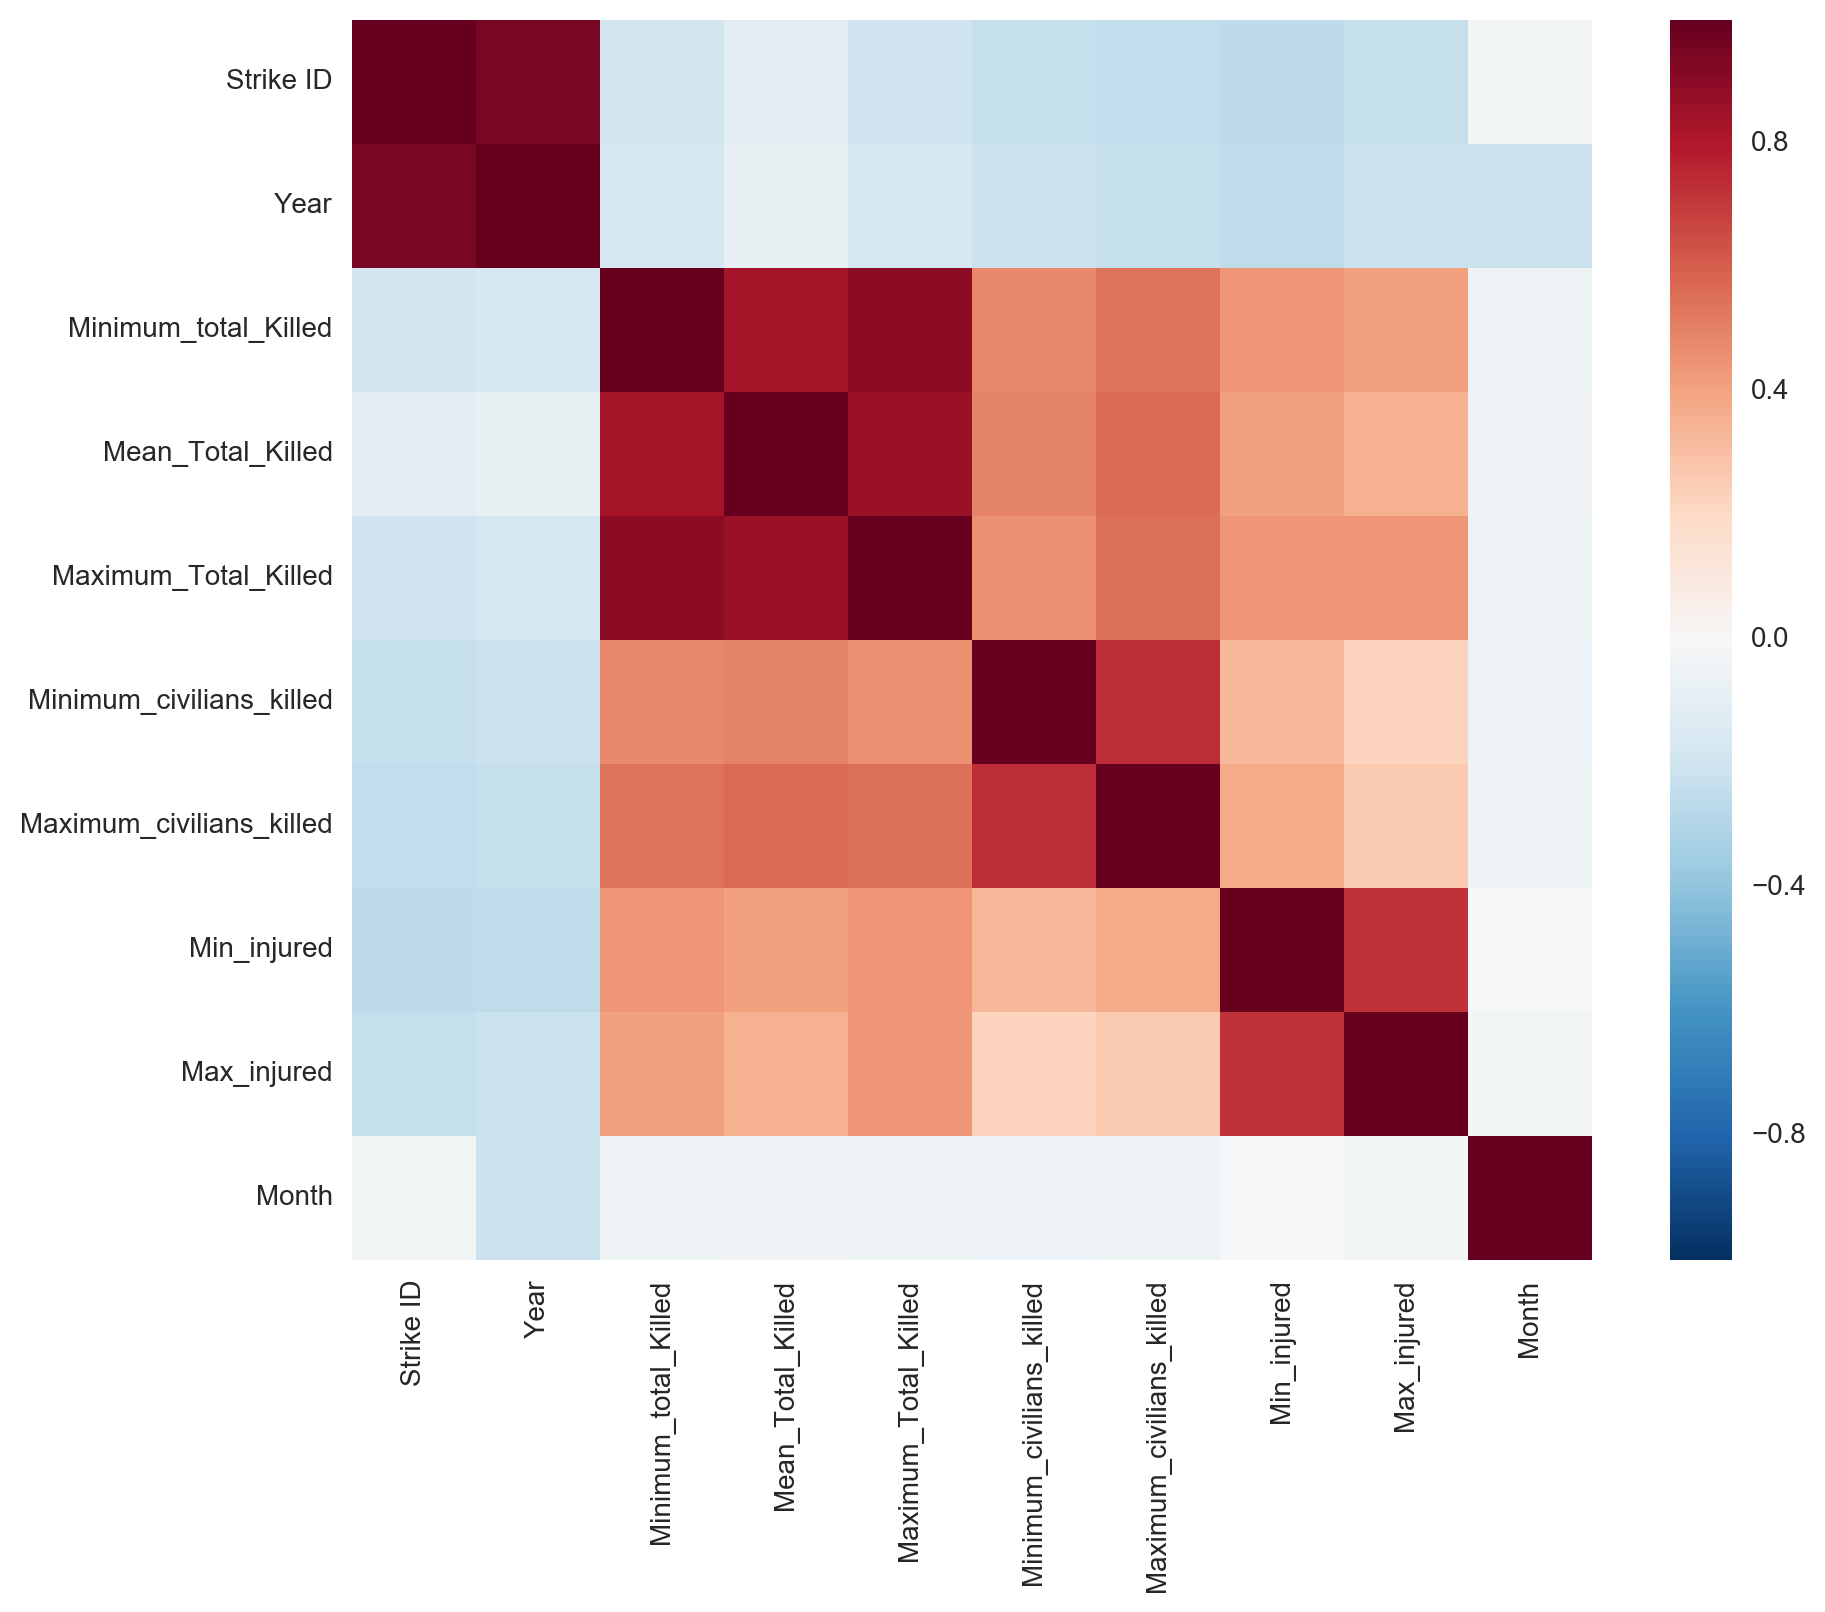

In [74]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()
#The correlation map is not necessary for this data set because most of the variables are correlated with each other. 
#But it is interesting to visualize the correlation between variables. 

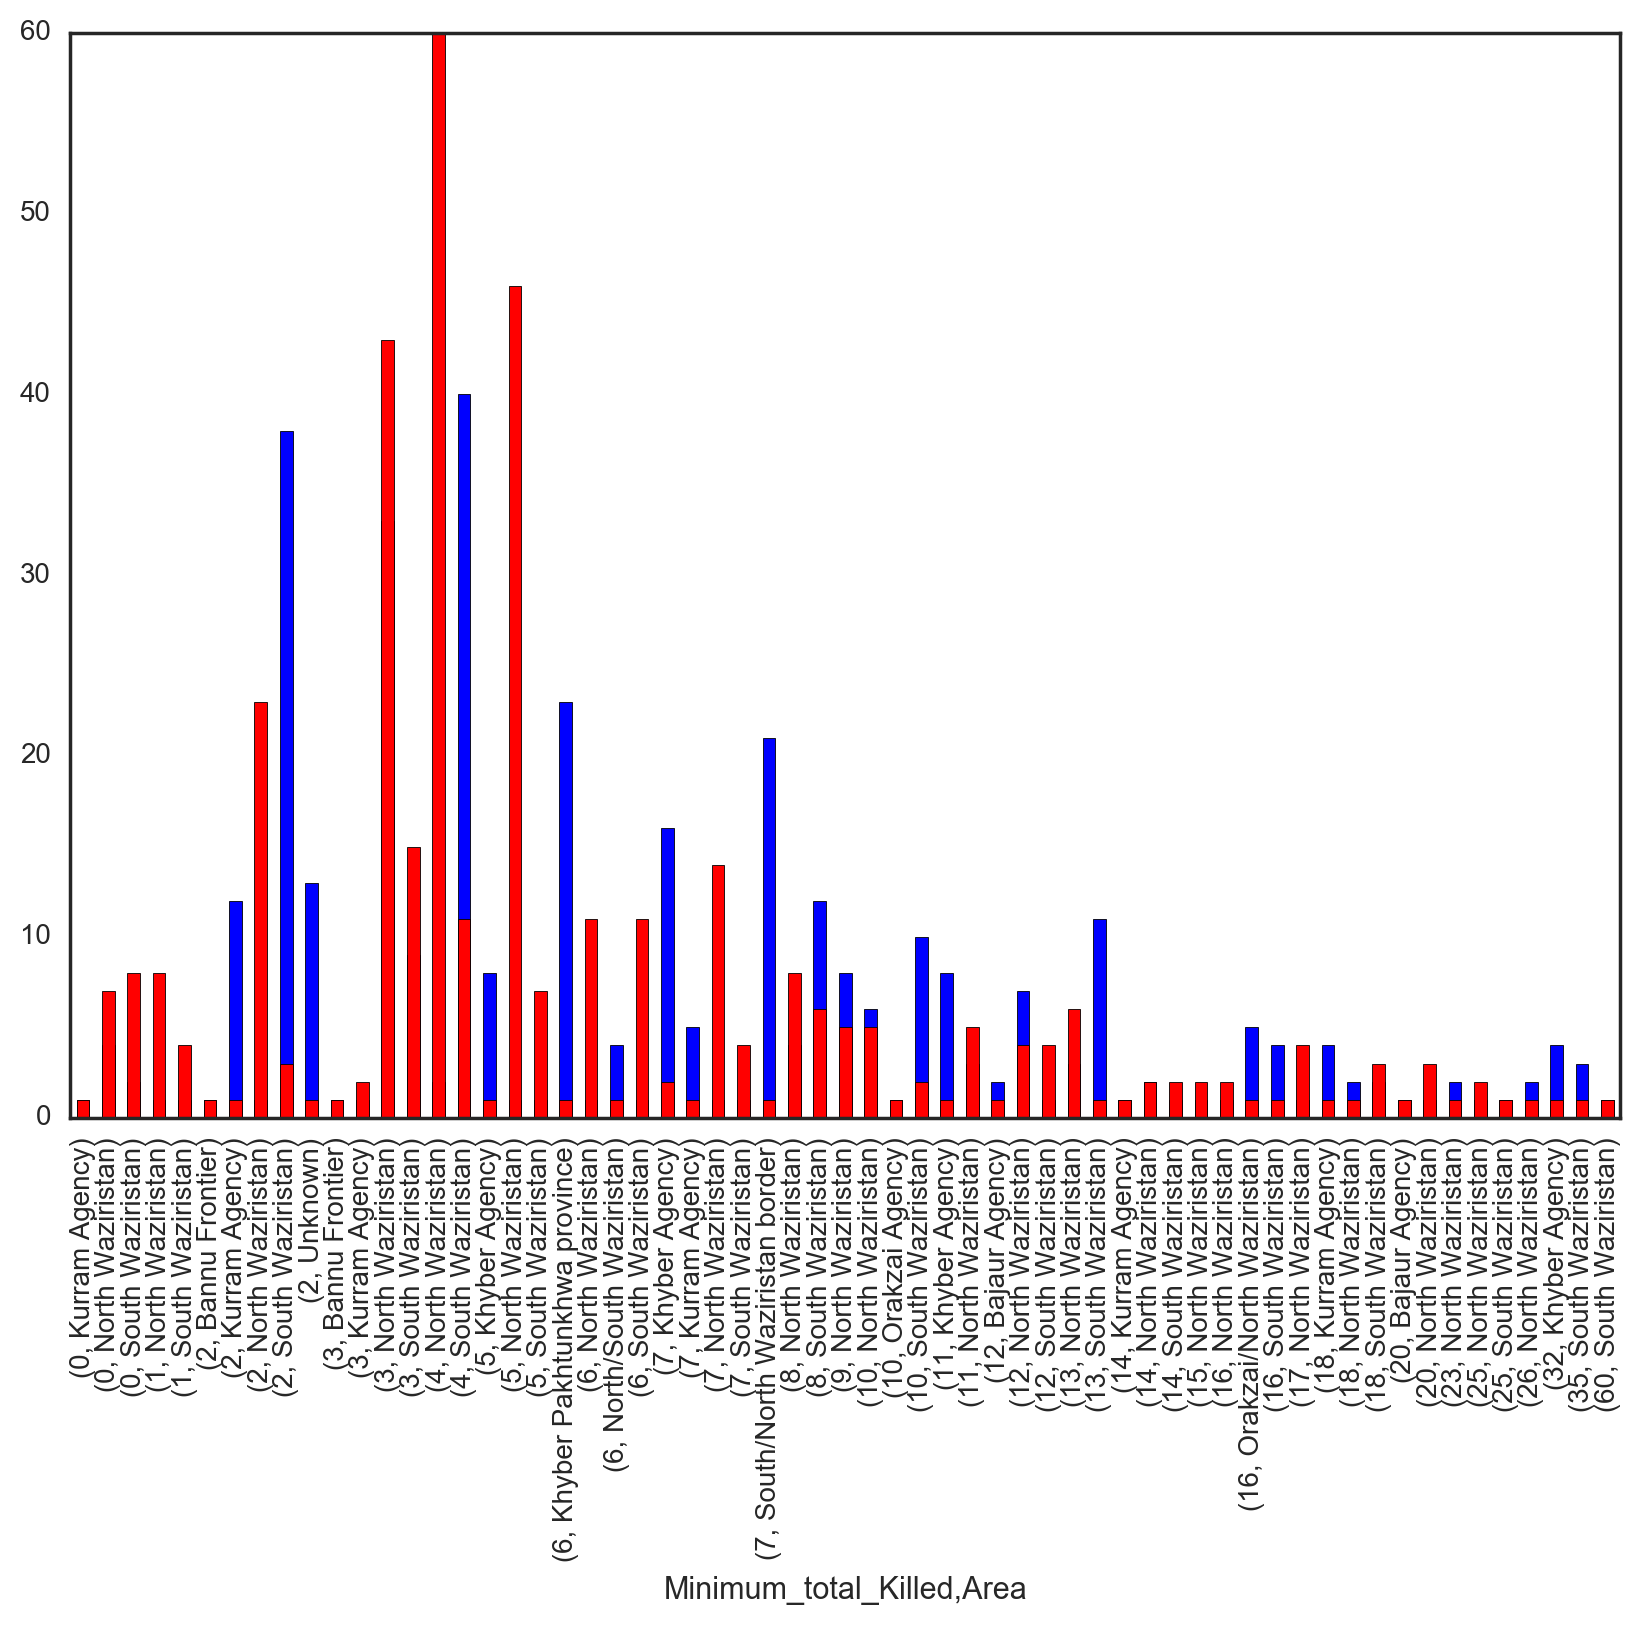

In [91]:
df.groupby(['Maximum_Total_Killed','Area']).size().plot(kind="bar", color='b')
df.groupby(['Minimum_total_Killed','Area']).size().plot(kind="bar", color='r')
plt.show()

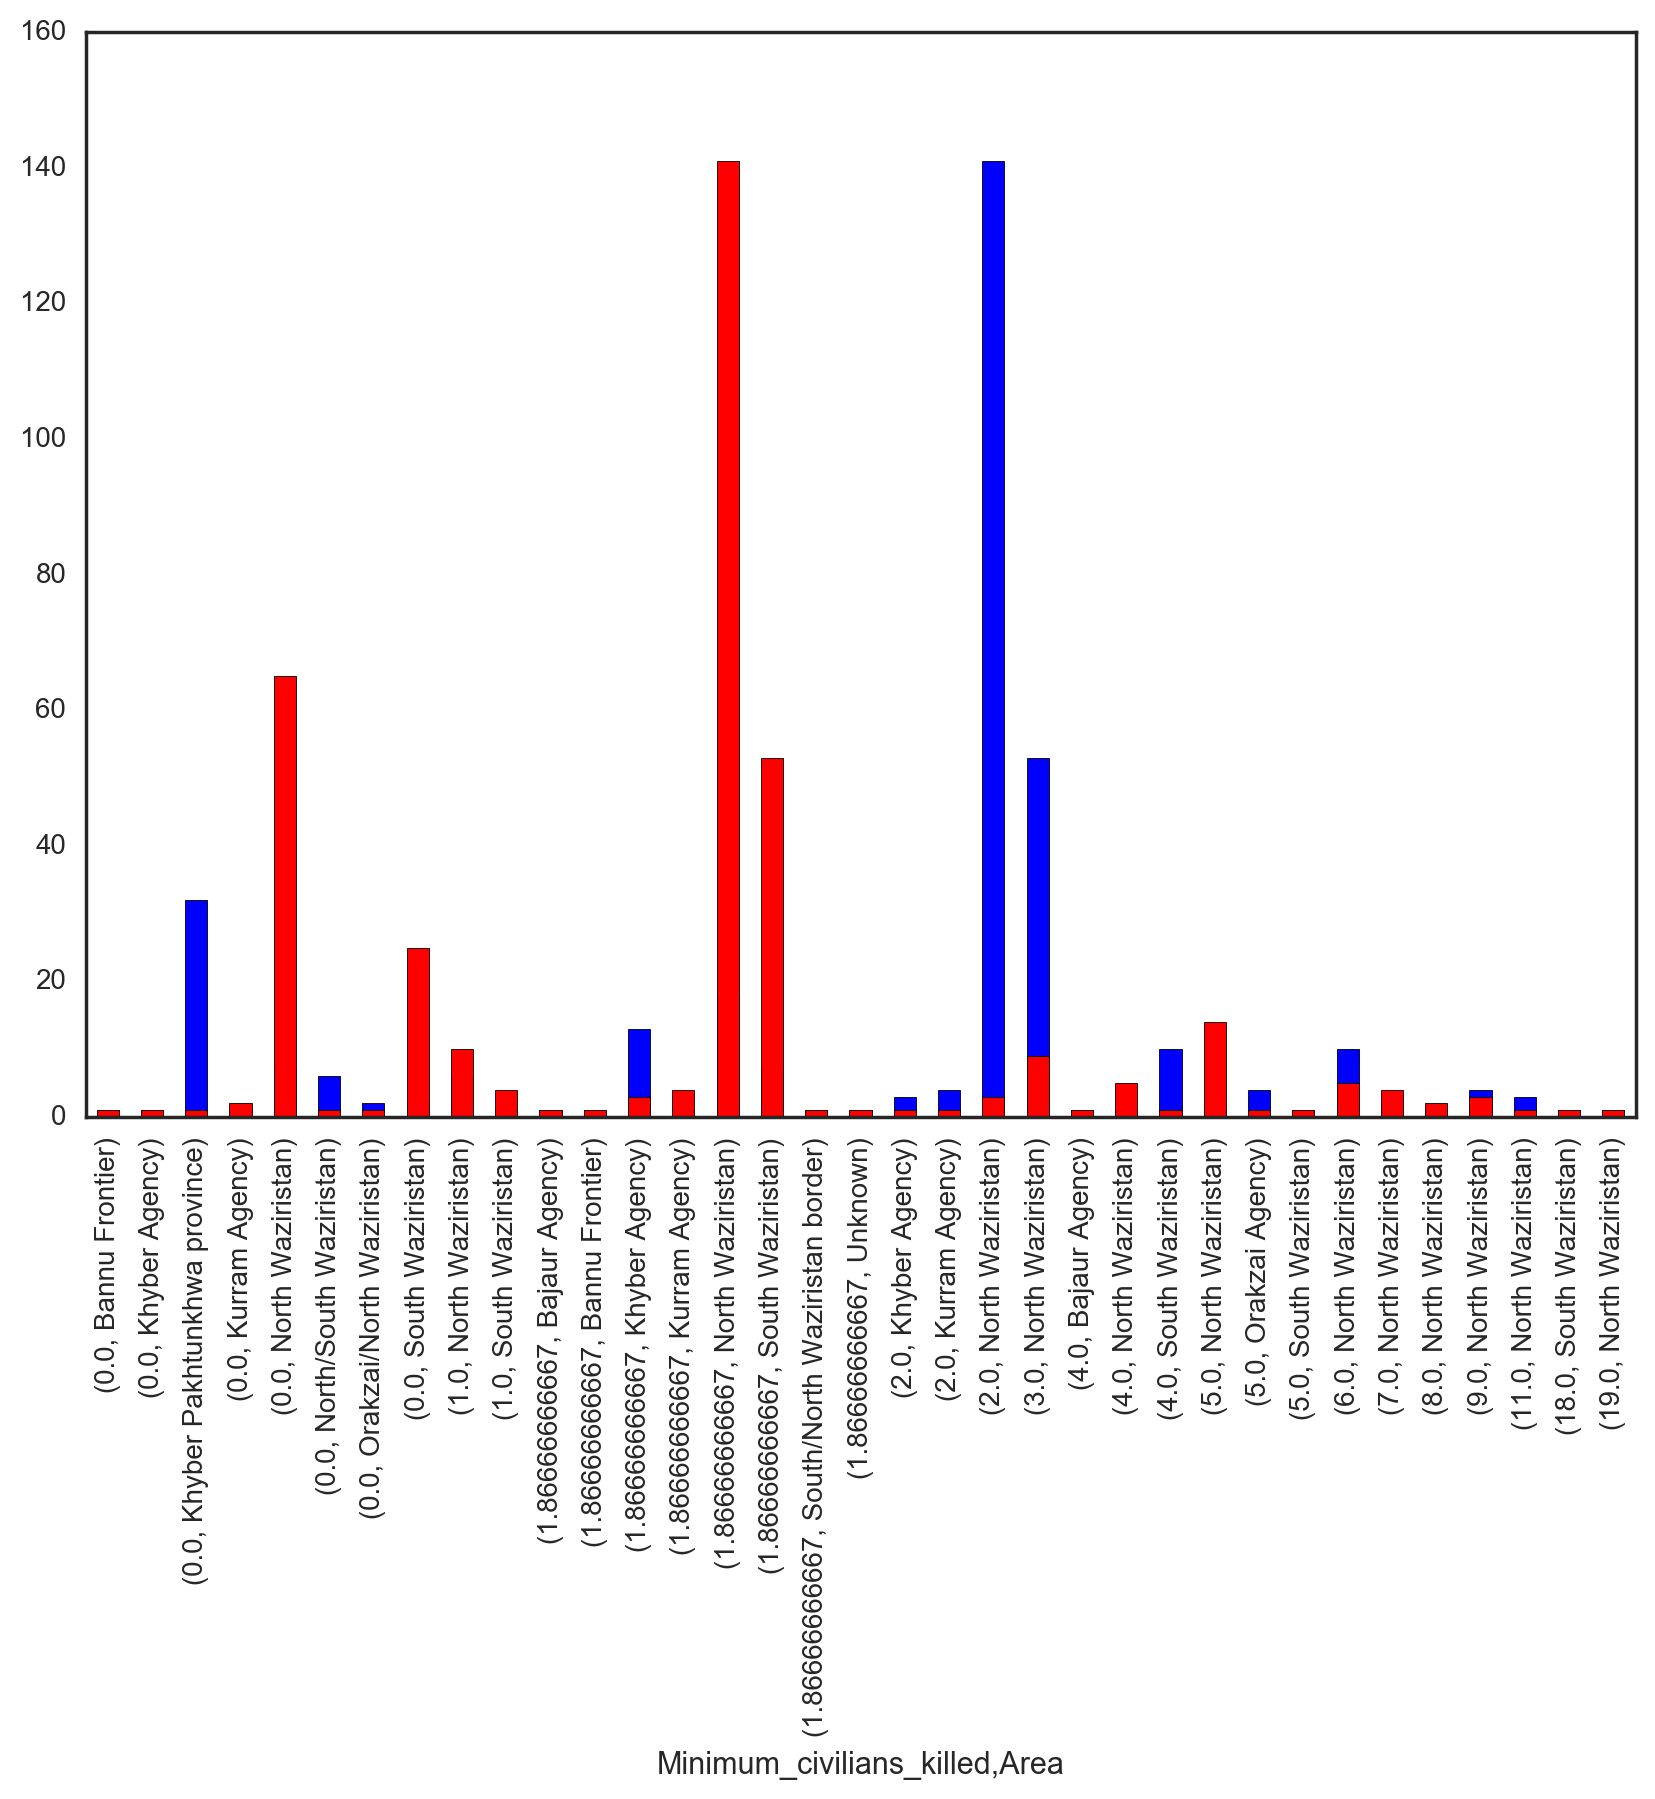

In [87]:
df.groupby(['Maximum_civilians_killed','Area']).size().plot(kind="bar", color='b')
df.groupby(['Minimum_civilians_killed','Area']).size().plot(kind="bar", color='r')
plt.show()

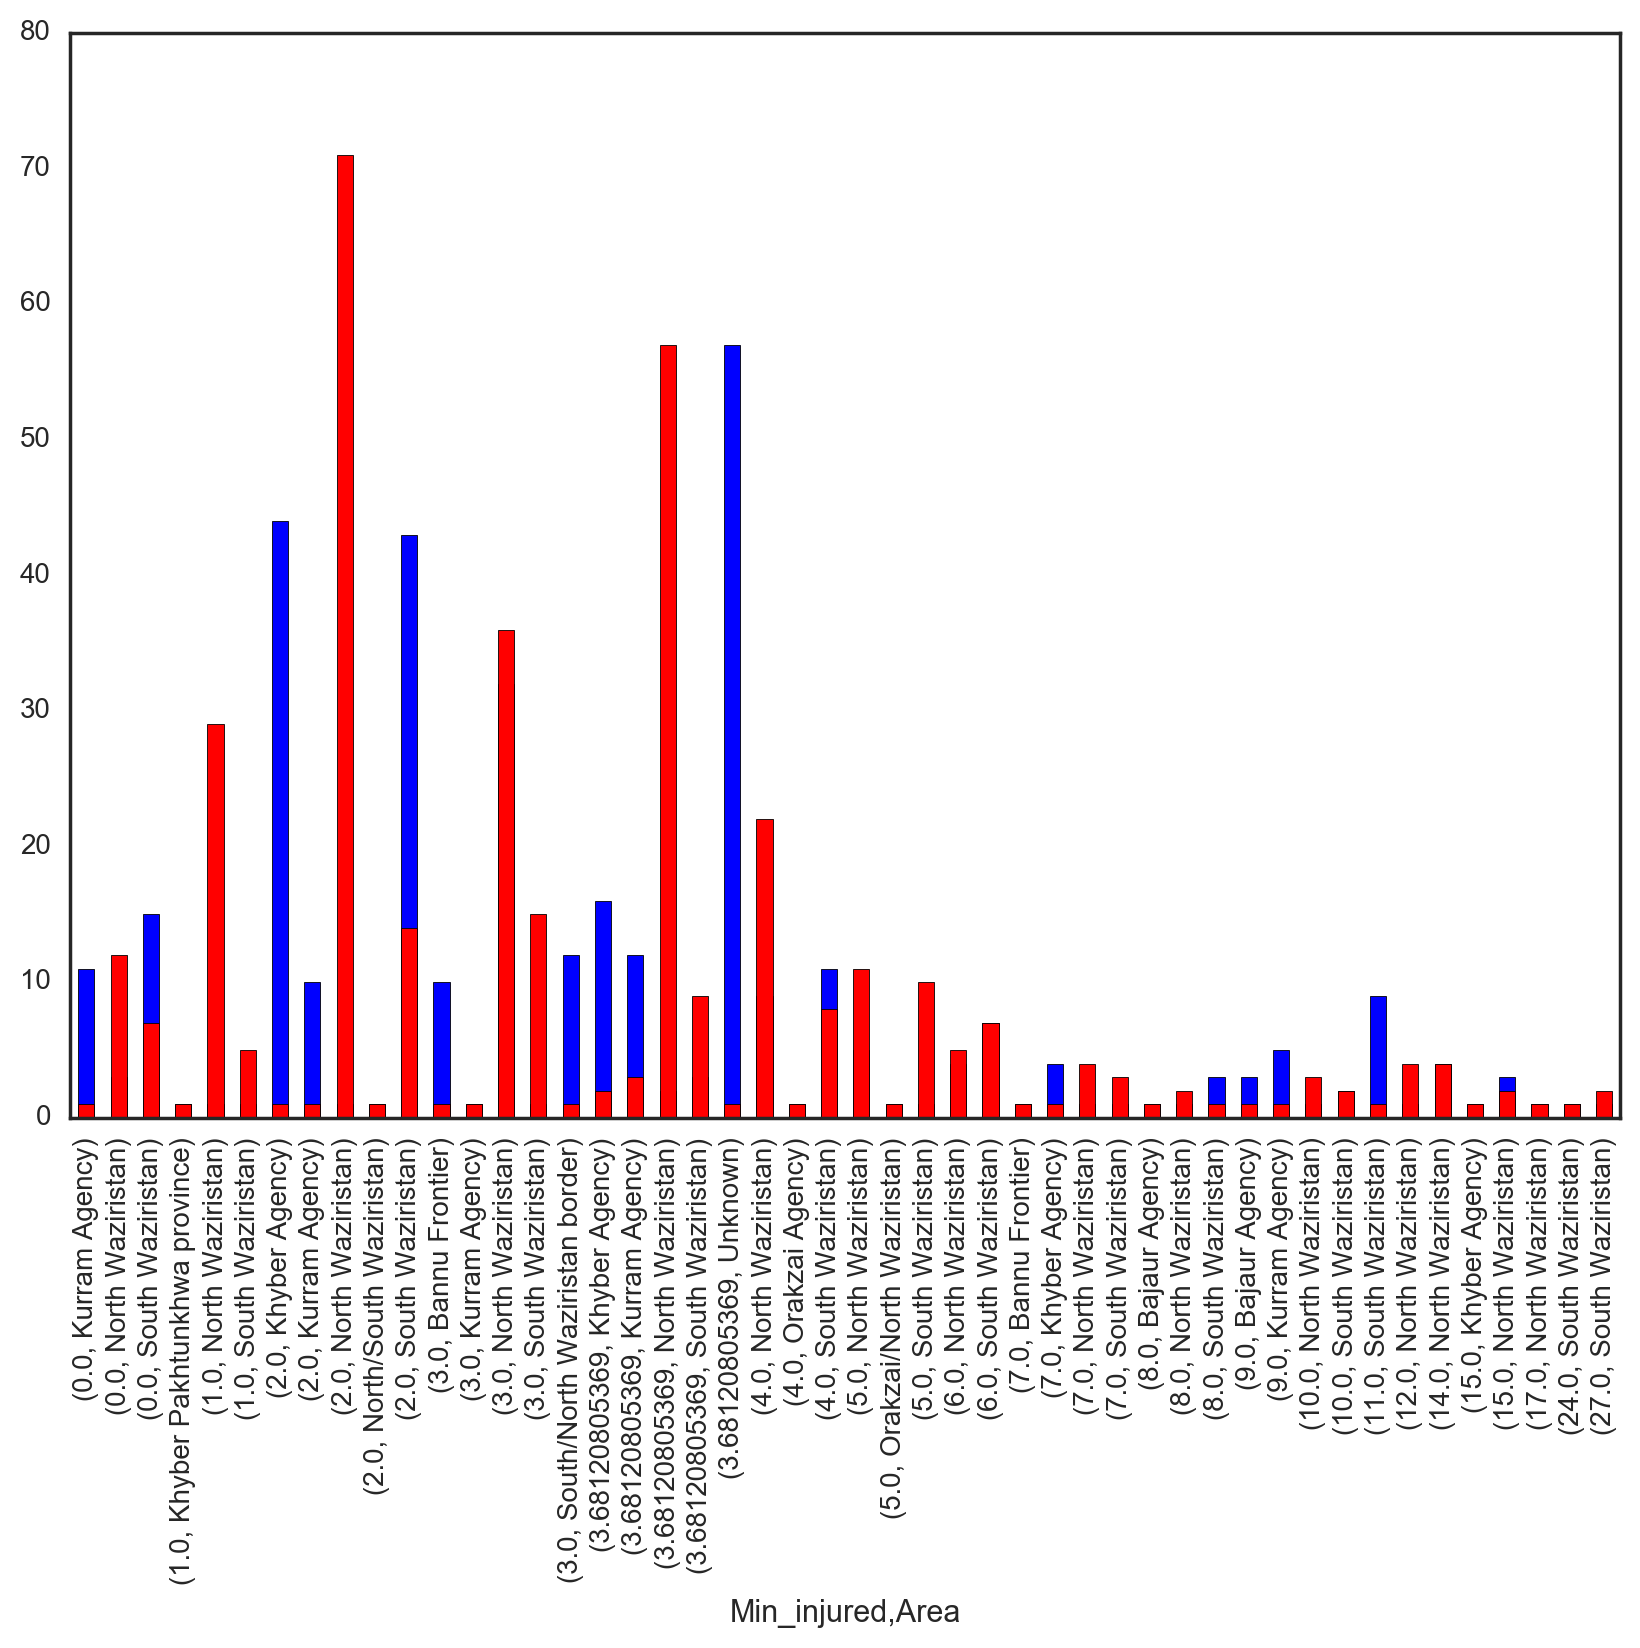

In [92]:
df.groupby(['Max_injured','Area']).size().plot(kind="bar", color='b')
df.groupby(['Min_injured','Area']).size().plot(kind="bar", color='r')
plt.show()

# Data Analysis:

The Drone Strikes data itself had lots of missing values. Some of the necessary variables had missing values or had data ranges when it should've had numeric values. Thus some varaibles were dropped.  
Majority of the missing values have been replaced with the mean value. The main focus was on variable "Mean_Total_Killed". I was not able to use OLS on Drone Strikes data frame. 
Year has been extracted from the month on excel before being transferred over to Python. Later month was added in Python. 
Below are the items I found from data exploration:

1) Critical variables like Number of Deaths and Number of Injury did not have correct values/maybe missing at random. 

2) The remainder variables had outliers at the max end. This can be seen on the histogram especially for the Mean_Total_Killed

3) Data summary showed more deaths in 2009 compared to any other years but the histogram shows otherwise. But Mean_Total_Killed has been replaced by the missing values from 2011-2013 and this could be why. This will only shows the average value and this could normalize the distribution. The 1st time series prediction from 2013 does not represent the true prediction because you cannot possibly have negative deaths. The remainder of the histograms and time series are the consistent with the table.

4) The Drone Strikes and Max injury chart (green and yellow) shows the relationship between Mean_Total_Death and Area. The chart showed more mean total death frequency(?) in North Waziristan in 2009 compared to any other region. By looking at the chart; you could conlude that South and North Waziristan region (especially North region) is prone to drone strikes. But comparing this result with Mean_Total_Death vs Area table shows otherwise. The Mean Total Death in North and South Waziristan area shows ~8-10 deaths compared to other regions like Bajaur, Khyber and Orakzai regions where mean total death ranges from ~14-19. Notice that the average is at 8.872 and majority of the North Waziristan area shows the mean value for 2012 and 2013. The histogram may have picked up on the frequency of the mean for North Waziristan region since it has been replaced by the mean value. Comparing ln[58] to ln[81] shows consistency. Grouping year, area and Mean_Total_Death shows lower number of mean_total_killed in North Waziristan area. 
But it is hard to conclude that there North and South Waziristan area is prone to drone strikes with the avaliable data frame. 

5) The correlation table was not necessary in this case because variables are correlated with each other. The correlation map just shows that. 

Also I wasn't able to choose top 5 variables that I was interested in because the remainder variables after data cleaning were correlated with each other. 
The variables that I was initially interested(number of death, & injured) in cannot be used due to number of missing values and they were dropped. 

Overall I wasn't able to use the data to do some modeling for causal inference due to limited number of useful variables. 